<a href="https://colab.research.google.com/github/KaileyLiou/AI-Summer-Institute/blob/main/Twitter_Classification_Project_(from_Summer_2024)_Mr_Liang's_Edits_(Step_1_Text_Prep).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Project Instructions (from the Citi PowerPoint on Google Classroom):

#Step 1: Text preparation – Clean data/word embedding (Week 2 of Program)
#Outlier removals, text processing steps (stemming/lemmatization, lower case conversion,
#Tokenization, Stop words Removal), and word embedding.

#Step 2: Topic classification (Week 3 of Program)
#Clustering the tweets to identify groups and relationships between topics
#(space-time dependencies), visualization (important).

#Step 3: Topic Sentiment Score (Week 4 (final week) of Program)
#Topics scores quantification (positive, negative, or neutral).
#Analyze score change over time (compared to competitors).

#Step 4: Business insights (Week 4 (final week) of Program)
#Provide a summary of specific insights that can trigger actions to improve customer satisfaction.
#Create a PowerPoint presentation to do so.

In [ ]:
%pip install gensim #Installs gensim library...
#Gensim is a popular, open-source Python library specifically
#designed for unsupervised topic modeling and natural language processing (NLP).

In [ ]:
%pip install pyLDAvis #Installs pyLDAvis
#pyLDAvis is a Python library used for visualizing topic models, particularly those generated by Latent Dirichlet Allocation (LDA).
#It provides an interactive web-based interface to explore and understand the relationships between topics and their associated keywords.
#The visualization helps users interpret the topics in a topic model by displaying a 2D distance map, word clouds, and other relevant
#information.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.6 MB/s eta 0:00:00


In [ ]:
%pip install vaderSentiment #Installs vaderSentiment library
#VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis
#tool specifically designed for social media text, but also effective on other domains. It is implemented
#as a Python library, vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
import pandas as pd
import re, string
#The re module allows you to work with regular expressions, which are powerful tools for pattern matching and string manipulation.
#The string module provides useful constants and classes for string operations.
from bs4 import BeautifulSoup
#BeautifulSoup from the bs4 module is used for parsing and extracting data from HTML or XML content.
import numpy as np
import gensim
from gensim import corpora
from gensim import models
from gensim.models import TfidfModel
import nltk #nltk (natural language toolkit) is a powerful library for working with human language data in Python.
#used for Tokenization: Split text into words or sentences, Stopwords Removal: Remove common words like “the”, “is”, etc.
#Stemming / Lemmatization: Reduce words to their base/root form, Part-of-speech tagging: Identify nouns, verbs, etc.
from nltk.corpus import names, stopwords, words
import pprint #Pretty Print formats data structures like lists, dictionaries, and nested objects in a readable, indented way.

from nltk.tokenize import word_tokenize
nltk.download("all")
from sklearn.feature_extraction.text import TfidfVectorizer
#TF-IDF (Term Frequency–Inverse Document Frequency) from scikit-learn is a widely used method
#for converting text into numeric features for machine learning.
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import wordcloud #module used to visualize the most frequent words in a body of text.
from wordcloud import WordCloud
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

In [ ]:
#This function reads data from a public Google Drive file.
def read_data(url):
  file_id = url.split('/')[-2] #url.split('/') breaks the URL into parts separated by /
  #[???] should grab the second-to-last part, which is the file ID.
  #Example:
  #url = 'https://drive.google.com/file/d/1A2B3C4D5E6F7G8H9I0J/view?usp=sharing'
  #url.split('/') → ['https:', '', 'drive.google.com', 'file', 'd', '1A2B3C4D5E6F7G8H9I0J', 'view?usp=sharing']
  #file_id = '1A2B3C4D5E6F7G8H9I0J'
  dwn_url = 'https://drive.google.com/uc?id=' + file_id #Constructs a direct download URL for the file.
  data = pd.read_csv(dwn_url)
  return data

#Q: Why can't we use the original link (the ones in the next cell)? Why do we need to create a function?
#A: The Google Drive share link (the ones below) aren't direct links to the file contents — it points to a webpage, not the raw file.
#The read_data function bypasses the web preview and points directly to the raw file content.

In [ ]:
am_ex = read_data('https://drive.google.com/file/d/1-Ea2lwnxE_vwCc4GdxV0v8T6tIVrQ5H_/view?usp=sharing')
bank_of_america = read_data('https://drive.google.com/file/d/1-DJdvDZjE1iI6C9aeN3607Xvwb20u6fi/view?usp=sharing')
capital_one = read_data('https://drive.google.com/file/d/1-Ca7mcZhpkB-PvGeCS9IebkmeVXTI7aY/view?usp=sharing')
chase = read_data('https://drive.google.com/file/d/1-CKc9GgpmabXKcUN4nTxvqZ6Ed7olDdN/view?usp=sharing')
citi = read_data('https://drive.google.com/file/d/1KKhtmJnqIByY3hEKp1YGupO5NvhZVnsc/view?usp=sharing')
wells_fargo = read_data('https://drive.google.com/file/d/1-6SrFcQ7muc1fgkzFnO7DDh7td_pMYW5/view?usp=sharing')

Text Preparation (Week 2 of Program)

In [ ]:
#Removes duplicate rows from the DataFrame, based only on the Tweet column.
#Keeps the first occurrence of each duplicate tweet; drops the others.
#Returns a new DataFrame; does not modify citi itself.
#Keeps the original row indexes in the returned DataFrame.
citi.drop_duplicates(subset='Tweet', keep='first', inplace=False, ignore_index=False)
citi.dropna(subset='Tweet') #Exercise: What does this line do? (This was used in the loan default project.)
#Answer: Drop the rows with null values with respect to the Tweet colum only

Tweet ID                                                URL  \
0       1.662154e+18  https://twitter.com/AskCiti/status/16621536780...   
1       1.662153e+18  https://twitter.com/AskCiti/status/16621533427...   
2       1.662140e+18  https://twitter.com/AskCiti/status/16621400089...   
3       1.662138e+18  https://twitter.com/AskCiti/status/16621379521...   
4       1.662136e+18  https://twitter.com/AskCiti/status/16621360621...   
...              ...                                                ...   
267828  3.351073e+17  https://twitter.com/AskCiti/status/33510730248...   
267829  3.351015e+17  https://twitter.com/AskCiti/status/33510152635...   
267830  3.350994e+17  https://twitter.com/AskCiti/status/33509939237...   
267831  3.350961e+17  https://twitter.com/AskCiti/status/33509610285...   
267832  3.350935e+17  https://twitter.com/AskCiti/status/33509346905...   

                         Timestamp  Username  User Bio  \
0       May 26, 2023 · 5:48 PM UTC  @AskCiti  Ask Citi   
1       May 26, 2023 · 5:46 PM UTC  @AskCiti  Ask Citi   
2       May 26, 2023 · 4:53 PM UTC  @AskCiti  Ask Citi   
3       May 26, 2023 · 4:45 PM UTC  @AskCiti  Ask Citi   
4       May 26, 2023 · 4:38 PM UTC  @AskCiti  Ask Citi   
...                            ...       ...       ...   
267828  May 16, 2013 · 6:59 PM UTC  @AskCiti  Ask Citi   
267829  May 16, 2013 · 6:36 PM UTC  @AskCiti  Ask Citi   
267830  May 16, 2013 · 6:28 PM UTC  @AskCiti  Ask Citi   
267831  May 16, 2013 · 6:15 PM UTC  @AskCiti  Ask Citi   
267832  May 16, 2013 · 6:04 PM UTC  @AskCiti  Ask Citi   

                                                    Tweet  
0       Hi Nelson, we haven't heard back and want to e...  
1       Hello! Thank you for raising this concern abou...  
2       Hello and welcome to Citibank U.S. This does n...  
3       The password requirements indicated "No digita...  
4       Hello and welcome to Citibank U.S. We would li...  
...                                                   ...  
267828  @jahson30 Thanks for your patience. To better ...  
267829  @jahson30 Great question! Let me check into th...  
267830  @mariel_enriquez Your tweet concerns me. So we...  
267831  @1songglory To better assist you can you pleas...  
267832  @dianalevitt Apologize for any troubles. Thank...  

[267833 rows x 6 columns]

In [ ]:
capital_one.drop_duplicates(subset='Tweet', keep='first', inplace=False, ignore_index=False)
capital_one.dropna(subset='Tweet')

Unnamed: 0             Tweet ID  \
0                0  1662569348362371075   
1                1  1662559135705989120   
2                2  1662559025500758016   
3                3  1662536842040729602   
4                4  1662536818590449665   
...            ...                  ...   
252792      252792   653563021286113280   
252793      252793   653562758718427136   
252794      252794   653561407632445440   
252795      252795   653561135640248320   
252796      252796   653560757758623744   

                                                      URL  \
0       https://twitter.com/AskCapitalOne/status/16625...   
1       https://twitter.com/AskCapitalOne/status/16625...   
2       https://twitter.com/AskCapitalOne/status/16625...   
3       https://twitter.com/AskCapitalOne/status/16625...   
4       https://twitter.com/AskCapitalOne/status/16625...   
...                                                   ...   
252792  https://twitter.com/AskCapitalOne/status/65356...   
252793  https://twitter.com/AskCapitalOne/status/65356...   
252794  https://twitter.com/AskCapitalOne/status/65356...   
252795  https://twitter.com/AskCapitalOne/status/65356...   
252796  https://twitter.com/AskCapitalOne/status/65356...   

                         Timestamp        Username     User Bio  \
0       May 27, 2023 · 9:19 PM UTC  @AskCapitalOne  Capital One   
1       May 27, 2023 · 8:39 PM UTC  @AskCapitalOne  Capital One   
2       May 27, 2023 · 8:38 PM UTC  @AskCapitalOne  Capital One   
3       May 27, 2023 · 7:10 PM UTC  @AskCapitalOne  Capital One   
4       May 27, 2023 · 7:10 PM UTC  @AskCapitalOne  Capital One   
...                            ...             ...          ...   
252792  Oct 12, 2015 · 1:29 PM UTC  @AskCapitalOne  Capital One   
252793  Oct 12, 2015 · 1:27 PM UTC  @AskCapitalOne  Capital One   
252794  Oct 12, 2015 · 1:22 PM UTC  @AskCapitalOne  Capital One   
252795  Oct 12, 2015 · 1:21 PM UTC  @AskCapitalOne  Capital One   
252796  Oct 12, 2015 · 1:20 PM UTC  @AskCapitalOne  Capital One   

                                                    Tweet  
0                          Thanks, Jeff. You as well! ^MC  
1       Hi there. Thanks for reaching out! Can you ple...  
2       Yes, the payment should qualify in this case i...  
3       as purchases, they would count toward the bonu...  
4       We're sorry for the confusion, Jeff. We unders...  
...                                                   ...  
252792  @Meterman145 DM us so we may gather more info ...  
252793  @JSBTOO Hello again! Great to hear from you. N...  
252794  @manoj007cs Thanks for the DM. Please Follow u...  
252795  @IWanaBIncognito If something's wrong, we want...  
252796  @Ross_Daniel_ Thanks for reaching out to us.  ...  

[252797 rows x 7 columns]

In [ ]:
am_ex.drop_duplicates(subset='Tweet', keep='first', inplace=False, ignore_index=False)
am_ex.dropna(subset='Tweet')

Unnamed: 0             Tweet ID  \
0                0  1662574105533530116   
1                1  1662567329794801664   
2                2  1662566175153217539   
3                3  1662555720682729472   
4                4  1662542814805106689   
...            ...                  ...   
107467      107467  1113081956915429376   
107468      107468  1113079791517872128   
107469      107469  1113079524336513025   
107470      107470  1113078363017613313   
107471      107471  1113076339395964928   

                                                      URL  \
0       https://twitter.com/AskAmex/status/16625741055...   
1       https://twitter.com/AskAmex/status/16625673297...   
2       https://twitter.com/AskAmex/status/16625661751...   
3       https://twitter.com/AskAmex/status/16625557206...   
4       https://twitter.com/AskAmex/status/16625428148...   
...                                                   ...   
107467  https://twitter.com/AskAmex/status/11130819569...   
107468  https://twitter.com/AskAmex/status/11130797915...   
107469  https://twitter.com/AskAmex/status/11130795243...   
107470  https://twitter.com/AskAmex/status/11130783630...   
107471  https://twitter.com/AskAmex/status/11130763393...   

                         Timestamp  Username  User Bio  \
0       May 27, 2023 · 9:38 PM UTC  @AskAmex  Ask Amex   
1       May 27, 2023 · 9:11 PM UTC  @AskAmex  Ask Amex   
2       May 27, 2023 · 9:07 PM UTC  @AskAmex  Ask Amex   
3       May 27, 2023 · 8:25 PM UTC  @AskAmex  Ask Amex   
4       May 27, 2023 · 7:34 PM UTC  @AskAmex  Ask Amex   
...                            ...       ...       ...   
107467   Apr 2, 2019 · 2:13 PM UTC  @AskAmex  Ask Amex   
107468   Apr 2, 2019 · 2:04 PM UTC  @AskAmex  Ask Amex   
107469   Apr 2, 2019 · 2:03 PM UTC  @AskAmex  Ask Amex   
107470   Apr 2, 2019 · 1:58 PM UTC  @AskAmex  Ask Amex   
107471   Apr 2, 2019 · 1:50 PM UTC  @AskAmex  Ask Amex   

                                                    Tweet  
0       Hi there, never heard back from you. Let me kn...  
1       Hi Ed, sorry about your loss. You may contact ...  
2       Hi, thank you for bringing this to our attenti...  
3       Hi there, thank you for reaching out and sorry...  
4       Hi there, never heard back from you. Let me kn...  
...                                                   ...  
107467  Thanks for the information you provided. Pleas...  
107468  Hi there. Thanks for tweeting. Is this concern...  
107469  Hello Peter. Interest on High Yield Savings Ac...  
107470  Good Morning Amanda and sorry for the issues. ...  
107471  Please follow and direct message us so we can ...  

[107472 rows x 7 columns]

In [ ]:
chase.drop_duplicates(subset='Tweet', keep='first', inplace=False, ignore_index=False)
chase.dropna(subset='Tweet')

Unnamed: 0             Tweet ID  \
0                0  1662556283914932224   
1                1  1662549780877262848   
2                2  1662542219830591490   
3                3  1662540035684532226   
4                4  1662527725653880834   
...            ...                  ...   
161352      161352  1027148667780820992   
161353      161353  1027147415139364864   
161354      161354  1027147414480846850   
161355      161355  1027147413159665664   
161356      161356  1027147411888726019   

                                                      URL  \
0       https://twitter.com/ChaseSupport/status/166255...   
1       https://twitter.com/ChaseSupport/status/166254...   
2       https://twitter.com/ChaseSupport/status/166254...   
3       https://twitter.com/ChaseSupport/status/166254...   
4       https://twitter.com/ChaseSupport/status/166252...   
...                                                   ...   
161352  https://twitter.com/ChaseSupport/status/102714...   
161353  https://twitter.com/ChaseSupport/status/102714...   
161354  https://twitter.com/ChaseSupport/status/102714...   
161355  https://twitter.com/ChaseSupport/status/102714...   
161356  https://twitter.com/ChaseSupport/status/102714...   

                         Timestamp       Username       User Bio  \
0       May 27, 2023 · 8:28 PM UTC  @ChaseSupport  Chase Support   
1       May 27, 2023 · 8:02 PM UTC  @ChaseSupport  Chase Support   
2       May 27, 2023 · 7:32 PM UTC  @ChaseSupport  Chase Support   
3       May 27, 2023 · 7:23 PM UTC  @ChaseSupport  Chase Support   
4       May 27, 2023 · 6:34 PM UTC  @ChaseSupport  Chase Support   
...                            ...            ...            ...   
161352  Aug 8, 2018 · 11:05 AM UTC  @ChaseSupport  Chase Support   
161353  Aug 8, 2018 · 11:00 AM UTC  @ChaseSupport  Chase Support   
161354  Aug 8, 2018 · 11:00 AM UTC  @ChaseSupport  Chase Support   
161355  Aug 8, 2018 · 11:00 AM UTC  @ChaseSupport  Chase Support   
161356  Aug 8, 2018 · 11:00 AM UTC  @ChaseSupport  Chase Support   

                                                    Tweet  
0       Hey, thanks for reaching out. We would be happ...  
1       Hi! I'm sorry to hear about your experience, a...  
2       Hi, I want to help with your experience, and I...  
3       Ritz-Carlton primary customers and authorized ...  
4       We're so happy to hear this. Have a great week...  
...                                                   ...  
161352  Hello, we would like to know what caused you t...  
161353  Hi, the Trip Cancellation benefit has terms an...  
161354  Welcome back to another exciting day of fantas...  
161355  Good morning. Your concern is important to us....  
161356  I'm glad you were able to take advantage of th...  

[161320 rows x 7 columns]

In [ ]:
wells_fargo.drop_duplicates(subset='Tweet', keep='first', inplace=False, ignore_index=False)
wells_fargo.dropna(subset='Tweet')

Unnamed: 0             Tweet ID  \
0                0  1662495257236307968   
1                1  1662461365296979969   
2                2  1662308385033801728   
3                3  1662271291393441792   
4                4  1662246117508014083   
...            ...                  ...   
155233      155233   920091387319681029   
155234      155234   920090989238411265   
155235      155235   920090843205300224   
155236      155236   920089204910149637   
155237      155237   920086677728751617   

                                                      URL  \
0       https://twitter.com/Ask_WellsFargo/status/1662...   
1       https://twitter.com/Ask_WellsFargo/status/1662...   
2       https://twitter.com/Ask_WellsFargo/status/1662...   
3       https://twitter.com/Ask_WellsFargo/status/1662...   
4       https://twitter.com/Ask_WellsFargo/status/1662...   
...                                                   ...   
155233  https://twitter.com/Ask_WellsFargo/status/9200...   
155234  https://twitter.com/Ask_WellsFargo/status/9200...   
155235  https://twitter.com/Ask_WellsFargo/status/9200...   
155236  https://twitter.com/Ask_WellsFargo/status/9200...   
155237  https://twitter.com/Ask_WellsFargo/status/9200...   

                          Timestamp         Username         User Bio  \
0        May 27, 2023 · 4:25 PM UTC  @Ask_WellsFargo  Ask Wells Fargo   
1        May 27, 2023 · 2:10 PM UTC  @Ask_WellsFargo  Ask Wells Fargo   
2        May 27, 2023 · 4:02 AM UTC  @Ask_WellsFargo  Ask Wells Fargo   
3        May 27, 2023 · 1:35 AM UTC  @Ask_WellsFargo  Ask Wells Fargo   
4       May 26, 2023 · 11:55 PM UTC  @Ask_WellsFargo  Ask Wells Fargo   
...                             ...              ...              ...   
155233  Oct 17, 2017 · 12:57 AM UTC  @Ask_WellsFargo  Ask Wells Fargo   
155234  Oct 17, 2017 · 12:56 AM UTC  @Ask_WellsFargo  Ask Wells Fargo   
155235  Oct 17, 2017 · 12:55 AM UTC  @Ask_WellsFargo  Ask Wells Fargo   
155236  Oct 17, 2017 · 12:48 AM UTC  @Ask_WellsFargo  Ask Wells Fargo   
155237  Oct 17, 2017 · 12:38 AM UTC  @Ask_WellsFargo  Ask Wells Fargo   

                                                    Tweet  
0       Hi, I saw your tweet. Can we look into somethi...  
1       If the account-owner can reach out to us throu...  
2       I noticed your tweet. Do you need assistance? ...  
3       I came across your tweet. Please try to delete...  
4       Hello! In a DM, can you provide more informati...  
...                                                   ...  
155233  I want to address the issue & try to help. Ple...  
155234  I apologize for the experience. Let me know if...  
155235  I would like to look into your concern. Please...  
155236  I'm sorry for the delay, Cierra. Did she get t...  
155237  Please allow me to address your concern. Send ...  

[155238 rows x 7 columns]

In [ ]:
#Complete for the Bank of America dataset
bank_of_america.drop_duplicates(subset='Tweet', keep='first', inplace=False, ignore_index=False)
bank_of_america.dropna(subset='Tweet')

Unnamed: 0             Tweet ID  \
0                0  1662538931970224128   
1                1  1662537207809208320   
2                2  1662533169722130432   
3                3  1662530496415387651   
4                4  1662516781251002368   
...            ...                  ...   
132542      132542  1157348182310969344   
132543      132543  1157347426145112064   
132544      132544  1157347366141403138   
132545      132545  1157346941438533633   
132546      132546  1157344891191664640   

                                                      URL  \
0       https://twitter.com/BofA_Help/status/166253893...   
1       https://twitter.com/BofA_Help/status/166253720...   
2       https://twitter.com/BofA_Help/status/166253316...   
3       https://twitter.com/BofA_Help/status/166253049...   
4       https://twitter.com/BofA_Help/status/166251678...   
...                                                   ...   
132542  https://twitter.com/BofA_Help/status/115734818...   
132543  https://twitter.com/BofA_Help/status/115734742...   
132544  https://twitter.com/BofA_Help/status/115734736...   
132545  https://twitter.com/BofA_Help/status/115734694...   
132546  https://twitter.com/BofA_Help/status/115734489...   

                         Timestamp    Username              User Bio  \
0       May 27, 2023 · 7:19 PM UTC  @BofA_Help  Bank of America Help   
1       May 27, 2023 · 7:12 PM UTC  @BofA_Help  Bank of America Help   
2       May 27, 2023 · 6:56 PM UTC  @BofA_Help  Bank of America Help   
3       May 27, 2023 · 6:45 PM UTC  @BofA_Help  Bank of America Help   
4       May 27, 2023 · 5:51 PM UTC  @BofA_Help  Bank of America Help   
...                            ...         ...                   ...   
132542   Aug 2, 2019 · 5:51 PM UTC  @BofA_Help  Bank of America Help   
132543   Aug 2, 2019 · 5:48 PM UTC  @BofA_Help  Bank of America Help   
132544   Aug 2, 2019 · 5:48 PM UTC  @BofA_Help  Bank of America Help   
132545   Aug 2, 2019 · 5:46 PM UTC  @BofA_Help  Bank of America Help   
132546   Aug 2, 2019 · 5:38 PM UTC  @BofA_Help  Bank of America Help   

                                                    Tweet  
0       Hello. We noticed you tagged us. If there is s...  
1       We noticed you tagged us and we'd like the opp...  
2       Hello. We noticed you tagged us. If there is s...  
3       If you change your mind and you'd like us to r...  
4       We offer our deepest condolences to you for yo...  
...                                                   ...  
132542  Hi, we use many factors to determine if a hold...  
132543  Hi, what happened? Anything I can do to help? ...  
132544  Hi. We are disappointed to see this and would ...  
132545  Hi, we apologize for the long wait times. Plea...  
132546  Hi Paris, we apologize for the inconvenience. ...  

[132547 rows x 7 columns]

In [ ]:
#Step 1: Text preparation – Clean data/word embedding (Week 2 of Program)

def tokenize(text):
  tokenized_text = nltk.word_tokenize(text)
  return tokenized_text
#Example:
#text = "Hello there! I'm learning NLP with NLTK."
#print(tokenize(text)) -> ['Hello', 'there', '!', 'I', "'m", 'learning', 'NLP', 'with', 'NLTK', '.']

def remove_stopwords(text):
  for stopword in english_stop_words:
        stopword = ' ' + stopword + ' ' #Adds spaces around each stopword to prevent removing parts of larger words.
        text = text.replace(stopword, ' ') #removes stopword from the text.
  return text
#english_stop_words is a collection of common English words that carry very little meaning by themselves
#and are often removed from text during preprocessing in natural language processing (NLP) tasks.
#These words include things like: "the", "is", "at", "which", "on", "and", "a", "an", "in", "of", "to", etc.

#Example:
# text = "I like the cat and the dog."
# stopword = " the "
# text = text.replace(stopword, ' ')
# text -> I like cat and dog.

def text_stemming(text):
    stemmed = ' '.join([stemmer.stem(token) for token in text.split()])
    #Note: [stemmer.stem(token) for token in text.split()] is an example of a list comprehension.
    #A list comprehension is a concise way to create a new list by applying an expression to each item.
    return stemmed
#text.split() splits the input string into words by whitespace.
#For each token (word), it applies stemmer.stem(token) to reduce the word to its stem/root form.
#The .join() method in Python is used to combine a list of strings into a single string, using a separator that you specify.
#Here, we're joining all the stemmed tokens back into a single string separated by spaces.
#Example:
# words = ['machine', 'learning', 'is', 'fun']
# sentence = ' '.join(words)
# sentence -> machine learning is fun

# def lemmatize(text):
#   lemmatizer = nltk.WordNetLemmatizer()
#   tokenized_text = tokenize(text)
#   lemmatized_text = ' '.join(lemmatizer.lemmatize(i) for i in text.split())
#   return lemmatized_text

def remove_non_english (text):
    # tokenized_text = nltk.word_tokenize(text)
    # for i in tokenized_text:
    #   if i not in english:
    #     text = text.replace(i, "")
    # return text
    tokenized_text = nltk.word_tokenize(text) #splits the input text into a list of tokens, i.e., words, punctuation, numbers, and more.
    filtered_text = [word for word in tokenized_text if word.lower() in english_set] #Complete this list comprehension.
    #the logical flow is: 1. Loop through each word in tokenized_text 2. Check the condition: Is word.lower() in english_set?
    #3. If yes, then include the word in the resulting list. The first 'word' (the one at the beginning of the list comprehension)
    #is the output, but it's only used if the if condition passes.
    return ' '.join(filtered_text)

def remove_html(text):
    bs = BeautifulSoup(text, "html.parser") #Parses the input text as HTML.
    return ' ' + bs.get_text() + ' ' #Adds a space before and after the cleaned text; this
    #might help avoid accidental word merging when combining texts later.

def keep_only_letters(text):
    text=re.sub(r'[^a-zA-Z\s]','',text) #a function from Python's re (regular expressions) module.
    #In general, the form is re.sub(pattern, replacement, text)
    #search the text for all substrings that match the pattern and replace them with replacement
    #[^...] means "match any character NOT in this set".
    #a-zA-Z — All lowercase and uppercase English letters.
    #\s — any whitespace character (spaces, tabs, newlines).
    #Hence, [^a-zA-Z\s] means any character that is NOT a letter or whitespace, which we're replacing with ''
    #The result is a string containing only letters and spaces.
    return text

#Exercise 1: What do you think is the output to these lines of code? (Answer at cell bottom)
# text = "Hello! This is version 2.0, isn't it?"
# clean_text = keep_only_letters(text)
# print(clean_text)

def convert_to_lowercase(text):
    return text.lower() #convert every character in the string to lowercase

def clean_reviews(text):
    text = remove_html(text)
    text = keep_only_letters(text)
    text = convert_to_lowercase(text)
    text = remove_non_english(text)
    return text
#cleans text by using each of the functions we wrote
#Use clean_reviews if you want a cleaned-up string but plan to do further processing later.

def pre_processing(text): #Fill in the blanks to call the various functions we made in this cell.
    text = remove_html(text)          # Strip HTML tags
    text = keep_only_letters(text)    # Remove anything except letters & spaces
    text = convert_to_lowercase(text) # Lowercase all text
    text = remove_non_english(text)   # Keep only English words
    text = text_stemming(text)        # Stem words to their root forms
    text = remove_stopwords(text)     # Remove common stopwords
    text = tokenize(text)             # Split text into tokens (words)
    return text                      # return list of clean tokens
#pre_processing for fully processed, tokenized text ready for machine learning models or text analysis.

#Answer to Exercise 1: Hello This is version  isnt it

Word Embedding (Week 2 of Program)



In [ ]:
#calculates TF-IDF (Term Frequency–Inverse Document Frequency) values for a list of documents and returns a dictionary
def tf_idf(text):
  vectorizer = TfidfVectorizer() # Create the TF-IDF vectorizer from sklearn.feature_extraction.text
  #This object will calculate TF-IDF scores.
  tfidf_matrix = vectorizer.fit_transform(text) #Fits the vectorizer on text, returns a sparse matrix (matrix of mostly zeros) where each row is a document
  #Each column is a word (feature) and each cell contains the TF-IDF score of that word in that document
  feature_names = vectorizer.get_feature_names_out() #Retrieves a list of the vocabulary words (i.e., the column names of the TF-IDF matrix) - see cell below
  tfidf_values = {} #create an empty dictionary to store the results.
  #Final form: {
  #0: {'this': 0.41, 'is': 0.41, ...},
  #1: {'another': 0.58, ...},
  #...
  #}

  for doc_index, doc in enumerate(text): #enumerate(text) gives you both the item in a list and the item's index - here it's the index and the document itself (string)
    feature_index = tfidf_matrix[doc_index, :].nonzero()[1] #tfidf_matrix[doc_index, :] selects the row for the current document,
    #.nonzero() returns the indices of all non-zero elements (i.e. TF-IDF values that are > 0),
    #[1] selects the column indices of those non-zero elements. Note: column_indices will contain the indices of the actual words (columns) that have non-zero TF-IDF values.
    tfidf_doc_values = zip(feature_index, [tfidf_matrix[doc_index, x] for x in feature_index])
    #1. feature_index: This is a list (or array) of column indices (word positions) where the TF-IDF score is non-zero in the current document.
    #Example: [2, 4, 7] means words at index 2, 4, and 7 appear in this document.
    #2. [tfidf_matrix[doc_index, x] for x in feature_index]
    #This is a list comprehension that gets the TF-IDF scores of those words in the current document.
    #For each word index x in feature_index, it extracts the value at row doc_index, column x.
    #Example: [0.45, 0.32, 0.27] — TF-IDF scores corresponding to the words at indices 2, 4, 7.
    #3. zip(feature_index, [...])
    #The zip() function pairs these two lists element-wise, creating pairs of (word_index, tfidf_score).
    #Example: [(2, 0.45), (4, 0.32), (7, 0.27)]
    tfidf_values[doc_index] = {feature_names[i]: value for i, value in tfidf_doc_values}
    #1. tfidf_doc_values: This is an iterable of pairs (i, value), where i is the index of a word (a column index in the TF-IDF matrix),
    #value is the TF-IDF score of that word in the current document.
    #2. {feature_names[i]: value for i, value in tfidf_doc_values}: This builds a dictionary by:
    #Looking up the actual word with feature_names[i] (since feature_names is a list/array of all words in the vocabulary),
    #Using that word as a key and then assigning the TF-IDF value as the dictionary value.
    #3. tfidf_values[doc_index] = : This dictionary is then stored in the big dictionary tfidf_values under the key doc_index —
    #so you keep track of TF-IDF scores per document.

    #Another example:
    #feature_names = ['apple', 'banana', 'orange']
    #tfidf_doc_values = [(0, 0.5), (2, 0.7)] (meaning 'apple' has score 0.5, 'orange' has 0.7)
    #Then: {feature_names[i]: value for i, value in tfidf_doc_values} becomes:
    #{'apple': 0.5, 'orange': 0.7}
    #And if this is for document 3: tfidf_values[3] = {'apple': 0.5, 'orange': 0.7}
  return tfidf_values

In [ ]:
#Another example of .nonzero()
arr = np.array([0, 0, 3, 0, 5])
print(arr.nonzero())

#Exercise 2: What indices does this code print?
myArray = np.array([1, 0, 1, 0, 5])
print(myArray.nonzero())
#Answer: ???

(array([2, 4]),)
(array([0, 2, 4]),)


In [ ]:
#Given these two lists:
students = ['Emma', 'Liam', 'Sophia', 'Noah']
fruits = ['Apple', 'Banana', 'Grapes', 'Orange']
#Use zip() to print sentences like this:
#Emma’s favorite fruit is Apple.
#Liam’s favorite fruit is Banana.
#Sophia’s favorite fruit is Grapes.
#Noah’s favorite fruit is Orange.

#Answer is in the next cell but try this on your own first.

In [ ]:










#Answer:
students = ['Emma', 'Liam', 'Sophia', 'Noah']
fruits = ['Apple', 'Banana', 'Grapes', 'Orange']

for student, fruit in zip(students, fruits):
    print(student + "’s favorite fruit is " + fruit + ".")

In [ ]:
#TF-IDF helps: Identify important words in each document, Reduce the influence of common words that don't carry much meaning, Represent text numerically for use in ML algorithms
#How is it calculated? TF-IDF(t,d)=TF(t,d)×IDF(t), where
#TF(t,d)= (Number of times term t appears in document d)/(Total number of terms in document d)
#TF (term frequency) measures how frequently a term appears in a document, normalized by the total number of words in that document.

#IDF(t)=log(N/(1+df(t)), N is the total number of documents, df(t) is the number of documents containing a term t
#+1 in denominator is for smoothing, to avoid dividing by 0.
#IDF (inverse document frequency) measures how rare or informative a word is across the entire corpus.
#TF-IDF is high when: The term is frequent in the current document (high TF), but rare across other documents (high IDF)

#Example of the Sparse Matrix
# | Document ↓ / Word →                   | a    | another | completely | content | different | is   | test | this |
# | ------------------------------------- | ---- | ------- | ---------- | ------- | --------- | ---- | ---- | ---- |
# | Doc 0: "this is a test"               | 0.58 | 0.00    | 0.00       | 0.00    | 0.00      | 0.41 | 0.41 | 0.41 |
# | Doc 1: "this is another test"         | 0.00 | 0.58    | 0.00       | 0.00    | 0.00      | 0.41 | 0.41 | 0.41 |
# | Doc 2: "completely different content" | 0.00 | 0.00    | 0.58       | 0.58    | 0.58      | 0.00 | 0.00 | 0.00 |

#End of Week 2 - Day 1 (7/14/25)

In [ ]:
stemmer = nltk.porter.PorterStemmer()
english_stop_words = nltk.corpus.stopwords.words('english')
english_set = set(word.lower() for word in words.words('en'))
newWords = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
english_stop_words.extend(newWords)


In [ ]:
citi['pre_processed'] = citi['Tweet'].apply(pre_processing)

C:\Users\thema\AppData\Local\Temp\ipykernel_24880\4155985305.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  bs = BeautifulSoup(text, "html.parser")


In [ ]:
capital_one['pre_processed'] = capital_one['Tweet'].apply(pre_processing)

C:\Users\thema\AppData\Local\Temp\ipykernel_24880\4155985305.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  bs = BeautifulSoup(text, "html.parser")


In [ ]:
am_ex['pre_processed'] = am_ex['Tweet'].apply(pre_processing)

C:\Users\thema\AppData\Local\Temp\ipykernel_24880\4155985305.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  bs = BeautifulSoup(text, "html.parser")


In [ ]:
chase['Tweet']= chase['Tweet'].apply(str)
chase['pre_processed'] = chase['Tweet'].apply(pre_processing)

C:\Users\thema\AppData\Local\Temp\ipykernel_24880\4155985305.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  bs = BeautifulSoup(text, "html.parser")


In [ ]:
wells_fargo['pre_processed'] = wells_fargo['Tweet'].apply(pre_processing)

C:\Users\thema\AppData\Local\Temp\ipykernel_24880\4155985305.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  bs = BeautifulSoup(text, "html.parser")


In [ ]:
bank_of_america['pre_processed'] = bank_of_america['Tweet'].apply(pre_processing)

C:\Users\thema\AppData\Local\Temp\ipykernel_24880\4155985305.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  bs = BeautifulSoup(text, "html.parser")


In [ ]:
citi.dropna(subset='pre_processed')

Tweet ID                                                URL  \
0       1.662154e+18  https://twitter.com/AskCiti/status/16621536780...   
1       1.662153e+18  https://twitter.com/AskCiti/status/16621533427...   
2       1.662140e+18  https://twitter.com/AskCiti/status/16621400089...   
3       1.662138e+18  https://twitter.com/AskCiti/status/16621379521...   
4       1.662136e+18  https://twitter.com/AskCiti/status/16621360621...   
...              ...                                                ...   
267828  3.351073e+17  https://twitter.com/AskCiti/status/33510730248...   
267829  3.351015e+17  https://twitter.com/AskCiti/status/33510152635...   
267830  3.350994e+17  https://twitter.com/AskCiti/status/33509939237...   
267831  3.350961e+17  https://twitter.com/AskCiti/status/33509610285...   
267832  3.350935e+17  https://twitter.com/AskCiti/status/33509346905...   

                         Timestamp  Username  User Bio  \
0       May 26, 2023 · 5:48 PM UTC  @AskCiti  Ask Citi   
1       May 26, 2023 · 5:46 PM UTC  @AskCiti  Ask Citi   
2       May 26, 2023 · 4:53 PM UTC  @AskCiti  Ask Citi   
3       May 26, 2023 · 4:45 PM UTC  @AskCiti  Ask Citi   
4       May 26, 2023 · 4:38 PM UTC  @AskCiti  Ask Citi   
...                            ...       ...       ...   
267828  May 16, 2013 · 6:59 PM UTC  @AskCiti  Ask Citi   
267829  May 16, 2013 · 6:36 PM UTC  @AskCiti  Ask Citi   
267830  May 16, 2013 · 6:28 PM UTC  @AskCiti  Ask Citi   
267831  May 16, 2013 · 6:15 PM UTC  @AskCiti  Ask Citi   
267832  May 16, 2013 · 6:04 PM UTC  @AskCiti  Ask Citi   

                                                    Tweet  \
0       Hi Nelson, we haven't heard back and want to e...   
1       Hello! Thank you for raising this concern abou...   
2       Hello and welcome to Citibank U.S. This does n...   
3       The password requirements indicated "No digita...   
4       Hello and welcome to Citibank U.S. We would li...   
...                                                   ...   
267828  @jahson30 Thanks for your patience. To better ...   
267829  @jahson30 Great question! Let me check into th...   
267830  @mariel_enriquez Your tweet concerns me. So we...   
267831  @1songglory To better assist you can you pleas...   
267832  @dianalevitt Apologize for any troubles. Thank...   

                                            pre_processed  
0       [hi, nelson, havent, back, want, ensur, need, ...  
1       [hello, thank, rais, thi, concern, made, someo...  
2       [hello, welcom, us, thi, doe, look, like, vali...  
3       [the, password, digit, base, password, provid,...  
4       [hello, welcom, us, would, like, see, help, pl...  
...                                                   ...  
267828  [thank, patienc, better, assist, thi, would, n...  
267829  [great, question, let, check, thi, repli, onc,...  
267830  [your, tweet, speak, directli, thi, time, call...  
267831  [to, better, assist, pleas, provid, us, type, ...  
267832  [apolog, ani, thank, us, thi, look, thi, see, ...  

[267833 rows x 7 columns]

In [ ]:
capital_one.dropna(subset='pre_processed')

Unnamed: 0             Tweet ID  \
0                0  1662569348362371075   
1                1  1662559135705989120   
2                2  1662559025500758016   
3                3  1662536842040729602   
4                4  1662536818590449665   
...            ...                  ...   
252792      252792   653563021286113280   
252793      252793   653562758718427136   
252794      252794   653561407632445440   
252795      252795   653561135640248320   
252796      252796   653560757758623744   

                                                      URL  \
0       https://twitter.com/AskCapitalOne/status/16625...   
1       https://twitter.com/AskCapitalOne/status/16625...   
2       https://twitter.com/AskCapitalOne/status/16625...   
3       https://twitter.com/AskCapitalOne/status/16625...   
4       https://twitter.com/AskCapitalOne/status/16625...   
...                                                   ...   
252792  https://twitter.com/AskCapitalOne/status/65356...   
252793  https://twitter.com/AskCapitalOne/status/65356...   
252794  https://twitter.com/AskCapitalOne/status/65356...   
252795  https://twitter.com/AskCapitalOne/status/65356...   
252796  https://twitter.com/AskCapitalOne/status/65356...   

                         Timestamp        Username     User Bio  \
0       May 27, 2023 · 9:19 PM UTC  @AskCapitalOne  Capital One   
1       May 27, 2023 · 8:39 PM UTC  @AskCapitalOne  Capital One   
2       May 27, 2023 · 8:38 PM UTC  @AskCapitalOne  Capital One   
3       May 27, 2023 · 7:10 PM UTC  @AskCapitalOne  Capital One   
4       May 27, 2023 · 7:10 PM UTC  @AskCapitalOne  Capital One   
...                            ...             ...          ...   
252792  Oct 12, 2015 · 1:29 PM UTC  @AskCapitalOne  Capital One   
252793  Oct 12, 2015 · 1:27 PM UTC  @AskCapitalOne  Capital One   
252794  Oct 12, 2015 · 1:22 PM UTC  @AskCapitalOne  Capital One   
252795  Oct 12, 2015 · 1:21 PM UTC  @AskCapitalOne  Capital One   
252796  Oct 12, 2015 · 1:20 PM UTC  @AskCapitalOne  Capital One   

                                                    Tweet  \
0                          Thanks, Jeff. You as well! ^MC   
1       Hi there. Thanks for reaching out! Can you ple...   
2       Yes, the payment should qualify in this case i...   
3       as purchases, they would count toward the bonu...   
4       We're sorry for the confusion, Jeff. We unders...   
...                                                   ...   
252792  @Meterman145 DM us so we may gather more info ...   
252793  @JSBTOO Hello again! Great to hear from you. N...   
252794  @manoj007cs Thanks for the DM. Please Follow u...   
252795  @IWanaBIncognito If something's wrong, we want...   
252796  @Ross_Daniel_ Thanks for reaching out to us.  ...   

                                            pre_processed  
0                                     [thank, jeff, well]  
1       [hi, thank, reach, pleas, provid, us, bit, con...  
2         [ye, payment, qualifi, thi, case, cash, advanc]  
3       [as, would, count, toward, bonu, would, need, ...  
4       [were, sorri, confus, jeff, understand, thi, r...  
...                                                   ...  
252792                [meterman, us, may, gather, privat]  
252793  [hello, great, hear, expir, date, earn, mani, ...  
252794           [thank, pleas, follow, us, may, respond]  
252795  [if, wrong, want, tri, make, right, us, may, a...  
252796  [thank, reach, us, us, see, thi, option, wa, a...  

[252797 rows x 8 columns]

In [ ]:
am_ex.dropna(subset='pre_processed')

Unnamed: 0             Tweet ID  \
0                0  1662574105533530116   
1                1  1662567329794801664   
2                2  1662566175153217539   
3                3  1662555720682729472   
4                4  1662542814805106689   
...            ...                  ...   
107467      107467  1113081956915429376   
107468      107468  1113079791517872128   
107469      107469  1113079524336513025   
107470      107470  1113078363017613313   
107471      107471  1113076339395964928   

                                                      URL  \
0       https://twitter.com/AskAmex/status/16625741055...   
1       https://twitter.com/AskAmex/status/16625673297...   
2       https://twitter.com/AskAmex/status/16625661751...   
3       https://twitter.com/AskAmex/status/16625557206...   
4       https://twitter.com/AskAmex/status/16625428148...   
...                                                   ...   
107467  https://twitter.com/AskAmex/status/11130819569...   
107468  https://twitter.com/AskAmex/status/11130797915...   
107469  https://twitter.com/AskAmex/status/11130795243...   
107470  https://twitter.com/AskAmex/status/11130783630...   
107471  https://twitter.com/AskAmex/status/11130763393...   

                         Timestamp  Username  User Bio  \
0       May 27, 2023 · 9:38 PM UTC  @AskAmex  Ask Amex   
1       May 27, 2023 · 9:11 PM UTC  @AskAmex  Ask Amex   
2       May 27, 2023 · 9:07 PM UTC  @AskAmex  Ask Amex   
3       May 27, 2023 · 8:25 PM UTC  @AskAmex  Ask Amex   
4       May 27, 2023 · 7:34 PM UTC  @AskAmex  Ask Amex   
...                            ...       ...       ...   
107467   Apr 2, 2019 · 2:13 PM UTC  @AskAmex  Ask Amex   
107468   Apr 2, 2019 · 2:04 PM UTC  @AskAmex  Ask Amex   
107469   Apr 2, 2019 · 2:03 PM UTC  @AskAmex  Ask Amex   
107470   Apr 2, 2019 · 1:58 PM UTC  @AskAmex  Ask Amex   
107471   Apr 2, 2019 · 1:50 PM UTC  @AskAmex  Ask Amex   

                                                    Tweet  \
0       Hi there, never heard back from you. Let me kn...   
1       Hi Ed, sorry about your loss. You may contact ...   
2       Hi, thank you for bringing this to our attenti...   
3       Hi there, thank you for reaching out and sorry...   
4       Hi there, never heard back from you. Let me kn...   
...                                                   ...   
107467  Thanks for the information you provided. Pleas...   
107468  Hi there. Thanks for tweeting. Is this concern...   
107469  Hello Peter. Interest on High Yield Savings Ac...   
107470  Good Morning Amanda and sorry for the issues. ...   
107471  Please follow and direct message us so we can ...   

                                            pre_processed  
0       [hi, never, back, let, know, may, assist, furt...  
1       [hi, ed, sorri, loss, may, contact, specialist...  
2       [hi, thank, thi, attent, see, ani, text, infor...  
3       [hi, thank, reach, sorri, hear, card, declin, ...  
4              [hi, never, back, let, know, need, assist]  
...                                                   ...  
107467  [thank, inform, provid, pleas, call, custom, s...  
107468  [hi, thank, thi, concern, regard, us, american...  
107469  [hello, peter, interest, high, yield, daili, p...  
107470  [good, morn, amanda, sorri, pleas, clear, cach...  
107471  [pleas, follow, direct, messag, us, assist, fu...  

[107472 rows x 8 columns]

In [ ]:
chase.dropna(subset='pre_processed')

Unnamed: 0             Tweet ID  \
0                0  1662556283914932224   
1                1  1662549780877262848   
2                2  1662542219830591490   
3                3  1662540035684532226   
4                4  1662527725653880834   
...            ...                  ...   
161352      161352  1027148667780820992   
161353      161353  1027147415139364864   
161354      161354  1027147414480846850   
161355      161355  1027147413159665664   
161356      161356  1027147411888726019   

                                                      URL  \
0       https://twitter.com/ChaseSupport/status/166255...   
1       https://twitter.com/ChaseSupport/status/166254...   
2       https://twitter.com/ChaseSupport/status/166254...   
3       https://twitter.com/ChaseSupport/status/166254...   
4       https://twitter.com/ChaseSupport/status/166252...   
...                                                   ...   
161352  https://twitter.com/ChaseSupport/status/102714...   
161353  https://twitter.com/ChaseSupport/status/102714...   
161354  https://twitter.com/ChaseSupport/status/102714...   
161355  https://twitter.com/ChaseSupport/status/102714...   
161356  https://twitter.com/ChaseSupport/status/102714...   

                         Timestamp       Username       User Bio  \
0       May 27, 2023 · 8:28 PM UTC  @ChaseSupport  Chase Support   
1       May 27, 2023 · 8:02 PM UTC  @ChaseSupport  Chase Support   
2       May 27, 2023 · 7:32 PM UTC  @ChaseSupport  Chase Support   
3       May 27, 2023 · 7:23 PM UTC  @ChaseSupport  Chase Support   
4       May 27, 2023 · 6:34 PM UTC  @ChaseSupport  Chase Support   
...                            ...            ...            ...   
161352  Aug 8, 2018 · 11:05 AM UTC  @ChaseSupport  Chase Support   
161353  Aug 8, 2018 · 11:00 AM UTC  @ChaseSupport  Chase Support   
161354  Aug 8, 2018 · 11:00 AM UTC  @ChaseSupport  Chase Support   
161355  Aug 8, 2018 · 11:00 AM UTC  @ChaseSupport  Chase Support   
161356  Aug 8, 2018 · 11:00 AM UTC  @ChaseSupport  Chase Support   

                                                    Tweet  \
0       Hey, thanks for reaching out. We would be happ...   
1       Hi! I'm sorry to hear about your experience, a...   
2       Hi, I want to help with your experience, and I...   
3       Ritz-Carlton primary customers and authorized ...   
4       We're so happy to hear this. Have a great week...   
...                                                   ...   
161352  Hello, we would like to know what caused you t...   
161353  Hi, the Trip Cancellation benefit has terms an...   
161354  Welcome back to another exciting day of fantas...   
161355  Good morning. Your concern is important to us....   
161356  I'm glad you were able to take advantage of th...   

                                            pre_processed  
0       [hey, thank, reach, would, happi, look, thi, c...  
1       [hi, sorri, hear, experi, support, card, could...  
2       [hi, want, help, experi, support, pleas, send,...  
3       [primari, author, complementari, prioriti, pas...  
4                [were, happi, hear, thi, great, weekend]  
...                                                   ...  
161352  [hello, would, like, know, tweet, thi, pleas, ...  
161353  [hi, trip, cancel, benefit, coverag, automat, ...  
161354  [welcom, back, anoth, excit, day, fantast, ani...  
161355  [good, morn, concern, import, us, dont, want, ...  
161356  [glad, abl, take, advantag, bonu, tweet, us, e...  

[161357 rows x 8 columns]

In [ ]:
wells_fargo.dropna(subset='pre_processed')

Unnamed: 0             Tweet ID  \
0                0  1662495257236307968   
1                1  1662461365296979969   
2                2  1662308385033801728   
3                3  1662271291393441792   
4                4  1662246117508014083   
...            ...                  ...   
155233      155233   920091387319681029   
155234      155234   920090989238411265   
155235      155235   920090843205300224   
155236      155236   920089204910149637   
155237      155237   920086677728751617   

                                                      URL  \
0       https://twitter.com/Ask_WellsFargo/status/1662...   
1       https://twitter.com/Ask_WellsFargo/status/1662...   
2       https://twitter.com/Ask_WellsFargo/status/1662...   
3       https://twitter.com/Ask_WellsFargo/status/1662...   
4       https://twitter.com/Ask_WellsFargo/status/1662...   
...                                                   ...   
155233  https://twitter.com/Ask_WellsFargo/status/9200...   
155234  https://twitter.com/Ask_WellsFargo/status/9200...   
155235  https://twitter.com/Ask_WellsFargo/status/9200...   
155236  https://twitter.com/Ask_WellsFargo/status/9200...   
155237  https://twitter.com/Ask_WellsFargo/status/9200...   

                          Timestamp         Username         User Bio  \
0        May 27, 2023 · 4:25 PM UTC  @Ask_WellsFargo  Ask Wells Fargo   
1        May 27, 2023 · 2:10 PM UTC  @Ask_WellsFargo  Ask Wells Fargo   
2        May 27, 2023 · 4:02 AM UTC  @Ask_WellsFargo  Ask Wells Fargo   
3        May 27, 2023 · 1:35 AM UTC  @Ask_WellsFargo  Ask Wells Fargo   
4       May 26, 2023 · 11:55 PM UTC  @Ask_WellsFargo  Ask Wells Fargo   
...                             ...              ...              ...   
155233  Oct 17, 2017 · 12:57 AM UTC  @Ask_WellsFargo  Ask Wells Fargo   
155234  Oct 17, 2017 · 12:56 AM UTC  @Ask_WellsFargo  Ask Wells Fargo   
155235  Oct 17, 2017 · 12:55 AM UTC  @Ask_WellsFargo  Ask Wells Fargo   
155236  Oct 17, 2017 · 12:48 AM UTC  @Ask_WellsFargo  Ask Wells Fargo   
155237  Oct 17, 2017 · 12:38 AM UTC  @Ask_WellsFargo  Ask Wells Fargo   

                                                    Tweet  \
0       Hi, I saw your tweet. Can we look into somethi...   
1       If the account-owner can reach out to us throu...   
2       I noticed your tweet. Do you need assistance? ...   
3       I came across your tweet. Please try to delete...   
4       Hello! In a DM, can you provide more informati...   
...                                                   ...   
155233  I want to address the issue & try to help. Ple...   
155234  I apologize for the experience. Let me know if...   
155235  I would like to look into your concern. Please...   
155236  I'm sorry for the delay, Cierra. Did she get t...   
155237  Please allow me to address your concern. Send ...   

                                            pre_processed  
0       [hi, saw, tweet, look, someth, specif, pleas, ...  
1       [if, reach, us, thi, platform, pleas, well, lo...  
2       [i, tweet, need, assist, pleas, share, direct,...  
3       [i, came, across, tweet, pleas, tri, delet, pu...  
4       [hello, provid, inform, account, wed, like, se...  
...                                                   ...  
155233  [i, want, address, issu, tri, help, pleas, sen...  
155234  [i, apolog, experi, let, know, someth, look, h...  
155235  [i, would, like, look, concern, pleas, send, a...  
155236  [sorri, delay, get, help, tell, reason, call, no]  
155237  [pleas, allow, address, concern, send, us, ful...  

[155238 rows x 8 columns]

In [ ]:
bank_of_america.dropna(subset='pre_processed')

Unnamed: 0             Tweet ID  \
0                0  1662538931970224128   
1                1  1662537207809208320   
2                2  1662533169722130432   
3                3  1662530496415387651   
4                4  1662516781251002368   
...            ...                  ...   
132542      132542  1157348182310969344   
132543      132543  1157347426145112064   
132544      132544  1157347366141403138   
132545      132545  1157346941438533633   
132546      132546  1157344891191664640   

                                                      URL  \
0       https://twitter.com/BofA_Help/status/166253893...   
1       https://twitter.com/BofA_Help/status/166253720...   
2       https://twitter.com/BofA_Help/status/166253316...   
3       https://twitter.com/BofA_Help/status/166253049...   
4       https://twitter.com/BofA_Help/status/166251678...   
...                                                   ...   
132542  https://twitter.com/BofA_Help/status/115734818...   
132543  https://twitter.com/BofA_Help/status/115734742...   
132544  https://twitter.com/BofA_Help/status/115734736...   
132545  https://twitter.com/BofA_Help/status/115734694...   
132546  https://twitter.com/BofA_Help/status/115734489...   

                         Timestamp    Username              User Bio  \
0       May 27, 2023 · 7:19 PM UTC  @BofA_Help  Bank of America Help   
1       May 27, 2023 · 7:12 PM UTC  @BofA_Help  Bank of America Help   
2       May 27, 2023 · 6:56 PM UTC  @BofA_Help  Bank of America Help   
3       May 27, 2023 · 6:45 PM UTC  @BofA_Help  Bank of America Help   
4       May 27, 2023 · 5:51 PM UTC  @BofA_Help  Bank of America Help   
...                            ...         ...                   ...   
132542   Aug 2, 2019 · 5:51 PM UTC  @BofA_Help  Bank of America Help   
132543   Aug 2, 2019 · 5:48 PM UTC  @BofA_Help  Bank of America Help   
132544   Aug 2, 2019 · 5:48 PM UTC  @BofA_Help  Bank of America Help   
132545   Aug 2, 2019 · 5:46 PM UTC  @BofA_Help  Bank of America Help   
132546   Aug 2, 2019 · 5:38 PM UTC  @BofA_Help  Bank of America Help   

                                                    Tweet  \
0       Hello. We noticed you tagged us. If there is s...   
1       We noticed you tagged us and we'd like the opp...   
2       Hello. We noticed you tagged us. If there is s...   
3       If you change your mind and you'd like us to r...   
4       We offer our deepest condolences to you for yo...   
...                                                   ...   
132542  Hi, we use many factors to determine if a hold...   
132543  Hi, what happened? Anything I can do to help? ...   
132544  Hi. We are disappointed to see this and would ...   
132545  Hi, we apologize for the long wait times. Plea...   
132546  Hi Paris, we apologize for the inconvenience. ...   

                                            pre_processed  
0       [hello, tag, us, someth, help, pleas, click, l...  
1       [we, tag, us, wed, like, opportun, speak, youd...  
2       [hello, tag, us, someth, help, pleas, click, l...  
3       [if, chang, mind, youd, like, us, review, acco...  
4       [we, offer, loss, secur, account, pleas, use, ...  
...                                                   ...  
132542  [hi, use, mani, determin, hold, item, long, le...  
132543                          [hi, anyth, help, annett]  
132544  [hi, disappoint, see, thi, would, like, see, h...  
132545  [hi, apolog, long, wait, time, pleas, let, us,...  
132546  [hi, pari, apolog, inconveni, pleas, click, li...  

[132547 rows x 8 columns]

In [ ]:
processed_corpus_citi = [text for text in citi['pre_processed']]
processed_corpus_capital_one = [text for text in capital_one['pre_processed']]
processed_corpus_am_ex = [text for text in am_ex['pre_processed']]
processed_corpus_chase = [text for text in chase['pre_processed']]
processed_corpus_wells_fargo = [text for text in wells_fargo['pre_processed']]
processed_corpus_bank_of_america = [text for text in bank_of_america['pre_processed']]

In [ ]:
dictionary_citi = corpora.Dictionary(processed_corpus_citi)
#print(dictionary)
dictionary_capital_one = corpora.Dictionary(processed_corpus_capital_one)
#print(dictionary_capital_one)
dictionary_am_ex = corpora.Dictionary(processed_corpus_am_ex)
dictionary_chase = corpora.Dictionary(processed_corpus_chase)
#print(dictionary_chase)
dictionary_wells_fargo = corpora.Dictionary(processed_corpus_wells_fargo)
dictionary_bank_of_america = corpora.Dictionary(processed_corpus_bank_of_america)

In [ ]:
bow_corpus_citi = [dictionary_citi.doc2bow(text) for text in processed_corpus_citi]
tfidf_citi = TfidfModel(bow_corpus_citi)
tfidf_corpus_citi = tfidf_citi[bow_corpus_citi]
lda_citi = models.LdaModel(tfidf_corpus_citi, num_topics=5, id2word=dictionary_citi, passes=15)
# lda_model = models.LdaMulticore(corpus=tfidf_corpus,
#                                        id2word=dictionary,
#                                        num_topics=3)

In [ ]:
bow_corpus_capital_one = [dictionary_capital_one.doc2bow(text) for text in processed_corpus_capital_one]
tfidf_capital_one = TfidfModel(bow_corpus_capital_one)
tfidf_corpus_capital_one = tfidf_capital_one[bow_corpus_capital_one]
lda_capital_one = models.LdaModel(tfidf_corpus_capital_one, num_topics=5, id2word=dictionary_capital_one, passes=15)
# lda_model = models.LdaMulticore(corpus=tfidf_corpus,
#                                        id2word=dictionary_capital_one,
#                                        num_topics=3)

In [ ]:
bow_corpus_am_ex = [dictionary_am_ex.doc2bow(text) for text in processed_corpus_am_ex]
tfidf_am_ex = TfidfModel(bow_corpus_am_ex)
tfidf_corpus_am_ex = tfidf_am_ex[bow_corpus_am_ex]
lda_am_ex = models.LdaModel(tfidf_corpus_am_ex, num_topics=5, id2word=dictionary_am_ex, passes=15)
# lda_model = models.LdaMulticore(corpus=tfidf_corpus_am_ex,
#                                        id2word=dictionary_am_ex,
#                                        num_topics=3)

In [ ]:
bow_corpus_chase = [dictionary_chase.doc2bow(text) for text in processed_corpus_chase]
tfidf_chase = TfidfModel(bow_corpus_chase)
tfidf_corpus_chase = tfidf_chase[bow_corpus_chase]
lda_chase = models.LdaModel(tfidf_corpus_chase, num_topics=5, id2word=dictionary_chase, passes=15)
# lda_model = models.LdaMulticore(corpus=tfidf_corpus_chase,
#                                        id2word=dictionary_chase,
#                                        num_topics=3)

In [ ]:
bow_corpus_bank_of_america = [dictionary_bank_of_america.doc2bow(text) for text in processed_corpus_bank_of_america]
tfidf_bank_of_america = TfidfModel(bow_corpus_bank_of_america)
tfidf_corpus_bank_of_america = tfidf_bank_of_america[bow_corpus_bank_of_america]
lda_bank_of_america = models.LdaModel(tfidf_corpus_bank_of_america, num_topics=5, id2word=dictionary_bank_of_america, passes=15)
# lda_model_bank_of_america = models.LdaMulticore(corpus=tfidf_corpus_bank_of_america,
#                                        id2word=dictionary_bank_of_america,
#                                        num_topics=3)

In [ ]:
bow_corpus_wells_fargo = [dictionary_wells_fargo.doc2bow(text) for text in processed_corpus_wells_fargo]
tfidf_wells_fargo = TfidfModel(bow_corpus_wells_fargo)
tfidf_corpus_wells_fargo = tfidf_wells_fargo[bow_corpus_wells_fargo]
lda_wells_fargo = models.LdaModel(tfidf_corpus_wells_fargo, num_topics=5, id2word=dictionary_wells_fargo, passes=15)
# lda_model_wells_fargo = models.LdaMulticore(corpus=tfidf_corpus_wells_fargo,
#                                        id2word=dictionary_wells_fargo,
#                                        num_topics=3)

In [ ]:
for idx, topic in lda_citi.print_topics(-1):
    print(f"Topic: {idx}\nWords: {topic}\n")

Topic: 0
Words: 0.055*"time" + 0.052*"best" + 0.050*"call" + 0.037*"phone" + 0.036*"no" + 0.033*"like" + 0.032*"id" + 0.031*"type" + 0.029*"sorri" + 0.029*"onli"

Topic: 1
Words: 0.042*"sorri" + 0.040*"today" + 0.033*"clear" + 0.030*"if" + 0.027*"ani" + 0.027*"veri" + 0.025*"cach" + 0.023*"ea" + 0.022*"troubl" + 0.022*"tri"

Topic: 2
Words: 0.045*"let" + 0.045*"know" + 0.044*"great" + 0.028*"glad" + 0.027*"need" + 0.027*"good" + 0.026*"anyth" + 0.022*"welcom" + 0.022*"us" + 0.020*"assist"

Topic: 3
Words: 0.022*"your" + 0.015*"card" + 0.014*"avail" + 0.011*"call" + 0.011*"soon" + 0.010*"the" + 0.010*"hope" + 0.010*"bank" + 0.010*"tomorrow" + 0.010*"talk"

Topic: 4
Words: 0.040*"ah" + 0.037*"contact" + 0.034*"someon" + 0.024*"team" + 0.022*"you" + 0.022*"thank" + 0.019*"forward" + 0.019*"i" + 0.019*"call" + 0.017*"link"



In [ ]:
for idx, topic in lda_am_ex.print_topics(-1):
    print(f"Topic: {idx}\nWords: {topic}\n")

Topic: 0
Words: 0.069*"chat" + 0.065*"go" + 0.063*"log" + 0.050*"button" + 0.050*"well" + 0.049*"right" + 0.048*"were" + 0.048*"repli" + 0.043*"immedi" + 0.037*"morn"

Topic: 1
Words: 0.021*"messag" + 0.021*"direct" + 0.020*"call" + 0.020*"secur" + 0.020*"follow" + 0.018*"look" + 0.018*"assist" + 0.017*"number" + 0.016*"twitter" + 0.016*"account"

Topic: 2
Words: 0.057*"person" + 0.056*"releas" + 0.047*"identifi" + 0.047*"inform" + 0.044*"ani" + 0.043*"product" + 0.036*"card" + 0.031*"us" + 0.024*"amex" + 0.024*"pleas"

Topic: 3
Words: 0.061*"day" + 0.056*"let" + 0.055*"know" + 0.052*"never" + 0.040*"back" + 0.039*"excel" + 0.033*"help" + 0.033*"still" + 0.032*"great" + 0.031*"enjoy"

Topic: 4
Words: 0.010*"card" + 0.010*"rachel" + 0.009*"thank" + 0.009*"tri" + 0.009*"thi" + 0.008*"good" + 0.008*"hi" + 0.008*"reach" + 0.008*"time" + 0.007*"appreci"



In [ ]:
for idx, topic in lda_bank_of_america.print_topics(-1):
    print(f"Topic: {idx}\nWords: {topic}\n")

Topic: 0
Words: 0.027*"appreci" + 0.024*"time" + 0.021*"feedback" + 0.019*"apolog" + 0.018*"tri" + 0.018*"still" + 0.018*"let" + 0.018*"know" + 0.017*"patienc" + 0.016*"locat"

Topic: 1
Words: 0.019*"card" + 0.018*"came" + 0.014*"across" + 0.013*"visit" + 0.013*"avail" + 0.013*"hold" + 0.012*"call" + 0.012*"file" + 0.012*"bank" + 0.010*"back"

Topic: 2
Words: 0.048*"saw" + 0.039*"help" + 0.037*"social" + 0.036*"team" + 0.036*"know" + 0.034*"let" + 0.032*"click" + 0.030*"us" + 0.030*"hi" + 0.028*"care"

Topic: 3
Words: 0.034*"full" + 0.032*"send" + 0.027*"review" + 0.027*"hunter" + 0.026*"annett" + 0.025*"number" + 0.023*"wed" + 0.023*"well" + 0.023*"mike" + 0.022*"thi"

Topic: 4
Words: 0.042*"phil" + 0.033*"messag" + 0.027*"way" + 0.027*"feel" + 0.023*"rachel" + 0.023*"thi" + 0.020*"like" + 0.020*"marti" + 0.019*"thank" + 0.017*"privat"



In [ ]:
for idx, topic in lda_capital_one.print_topics(-1):
    print(f"Topic: {idx}\nWords: {topic}\n")

Topic: 0
Words: 0.051*"anyth" + 0.039*"saw" + 0.026*"ask" + 0.022*"have" + 0.021*"not" + 0.019*"travel" + 0.017*"lost" + 0.017*"clarifi" + 0.015*"card" + 0.015*"readi"

Topic: 1
Words: 0.026*"help" + 0.026*"follow" + 0.026*"us" + 0.024*"tweet" + 0.021*"well" + 0.020*"pleas" + 0.018*"get" + 0.017*"happi" + 0.015*"give" + 0.014*"we"

Topic: 2
Words: 0.071*"know" + 0.063*"let" + 0.036*"us" + 0.034*"hey" + 0.032*"card" + 0.032*"help" + 0.031*"product" + 0.028*"debit" + 0.024*"credit" + 0.021*"assist"

Topic: 3
Words: 0.030*"welcom" + 0.021*"great" + 0.017*"no" + 0.013*"question" + 0.012*"card" + 0.009*"cash" + 0.009*"aa" + 0.009*"set" + 0.009*"one" + 0.008*"branch"

Topic: 4
Words: 0.019*"chat" + 0.016*"full" + 0.013*"log" + 0.012*"site" + 0.012*"comput" + 0.011*"login" + 0.010*"click" + 0.010*"request" + 0.010*"ur" + 0.010*"oh"



In [ ]:
for idx, topic in lda_chase.print_topics(-1):
    print(f"Topic: {idx}\nWords: {topic}\n")

Topic: 0
Words: 0.092*"never" + 0.090*"el" + 0.085*"type" + 0.072*"want" + 0.071*"repres" + 0.068*"experi" + 0.043*"chase" + 0.033*"could" + 0.026*"thi" + 0.023*"share"

Topic: 1
Words: 0.016*"call" + 0.015*"team" + 0.015*"card" + 0.011*"reach" + 0.010*"may" + 0.010*"chase" + 0.009*"credit" + 0.009*"issu" + 0.008*"tri" + 0.008*"account"

Topic: 2
Words: 0.045*"concern" + 0.043*"tweet" + 0.041*"addit" + 0.037*"would" + 0.036*"code" + 0.036*"like" + 0.034*"your" + 0.031*"id" + 0.030*"hello" + 0.029*"zip"

Topic: 3
Words: 0.034*"were" + 0.032*"hear" + 0.028*"sorri" + 0.023*"feel" + 0.021*"wed" + 0.019*"thank" + 0.019*"thi" + 0.019*"happi" + 0.018*"glad" + 0.018*"us"

Topic: 4
Words: 0.036*"let" + 0.028*"feedback" + 0.027*"know" + 0.026*"we" + 0.026*"sure" + 0.024*"make" + 0.023*"us" + 0.023*"it" + 0.020*"receiv" + 0.017*"messag"



In [ ]:
for idx, topic in lda_wells_fargo.print_topics(-1):
    print(f"Topic: {idx}\nWords: {topic}\n")

Topic: 0
Words: 0.032*"know" + 0.028*"let" + 0.027*"need" + 0.025*"no" + 0.022*"someth" + 0.020*"assist" + 0.020*"help" + 0.018*"specif" + 0.015*"happen" + 0.014*"tweet"

Topic: 1
Words: 0.023*"visit" + 0.022*"call" + 0.018*"feedback" + 0.016*"immedi" + 0.015*"thank" + 0.015*"team" + 0.014*"receiv" + 0.014*"speak" + 0.013*"banker" + 0.013*"thi"

Topic: 2
Words: 0.046*"what" + 0.037*"tell" + 0.033*"ill" + 0.026*"best" + 0.026*"way" + 0.026*"go" + 0.025*"help" + 0.024*"feel" + 0.023*"situat" + 0.022*"make"

Topic: 3
Words: 0.038*"address" + 0.038*"number" + 0.036*"name" + 0.036*"phone" + 0.033*"full" + 0.024*"look" + 0.021*"send" + 0.019*"like" + 0.018*"us" + 0.017*"review"

Topic: 4
Words: 0.059*"he" + 0.045*"welcom" + 0.034*"could" + 0.031*"is" + 0.028*"reason" + 0.027*"that" + 0.023*"stop" + 0.020*"turn" + 0.019*"tell" + 0.019*"someth"



Coherence Scores

In [ ]:
coherence_model_citi = CoherenceModel(model=lda_citi, texts= processed_corpus_citi, dictionary=dictionary_citi, coherence='c_v')
coherence_score_citi = coherence_model_citi.get_coherence()
print(f"Coherence Score: {coherence_score_citi:.2f}")

Coherence Score: 0.38


In [ ]:
coherence_model_chase = CoherenceModel(model=lda_chase, texts= processed_corpus_chase, dictionary=dictionary_chase, coherence='c_v')
coherence_score_chase = coherence_model_chase.get_coherence()
print(f"Coherence Score: {coherence_score_chase:.2f}")

Coherence Score: 0.48


In [ ]:
coherence_model_bank_of_america = CoherenceModel(model=lda_bank_of_america, texts= processed_corpus_bank_of_america, dictionary=dictionary_bank_of_america, coherence='c_v')
coherence_score_bank_of_america = coherence_model_bank_of_america.get_coherence()
print(f"Coherence Score: {coherence_score_bank_of_america:.2f}")

Coherence Score: 0.41


In [ ]:
coherence_model_wells_fargo = CoherenceModel(model=lda_wells_fargo, texts= processed_corpus_wells_fargo, dictionary=dictionary_wells_fargo, coherence='c_v')
coherence_score_wells_fargo = coherence_model_wells_fargo.get_coherence()
print(f"Coherence Score: {coherence_score_wells_fargo:.2f}")

Coherence Score: 0.42


In [ ]:
coherence_model_capital_one = CoherenceModel(model=lda_capital_one, texts= processed_corpus_capital_one, dictionary=dictionary_capital_one, coherence='c_v')
coherence_score_capital_one = coherence_model_capital_one.get_coherence()
print(f"Coherence Score: {coherence_score_capital_one:.2f}")

Coherence Score: 0.33


In [ ]:
coherence_model_am_ex = CoherenceModel(model=lda_am_ex, texts= processed_corpus_am_ex, dictionary=dictionary_am_ex, coherence='c_v')
coherence_score_am_ex = coherence_model_am_ex.get_coherence()
print(f"Coherence Score: {coherence_score_am_ex:.2f}")

Coherence Score: 0.48


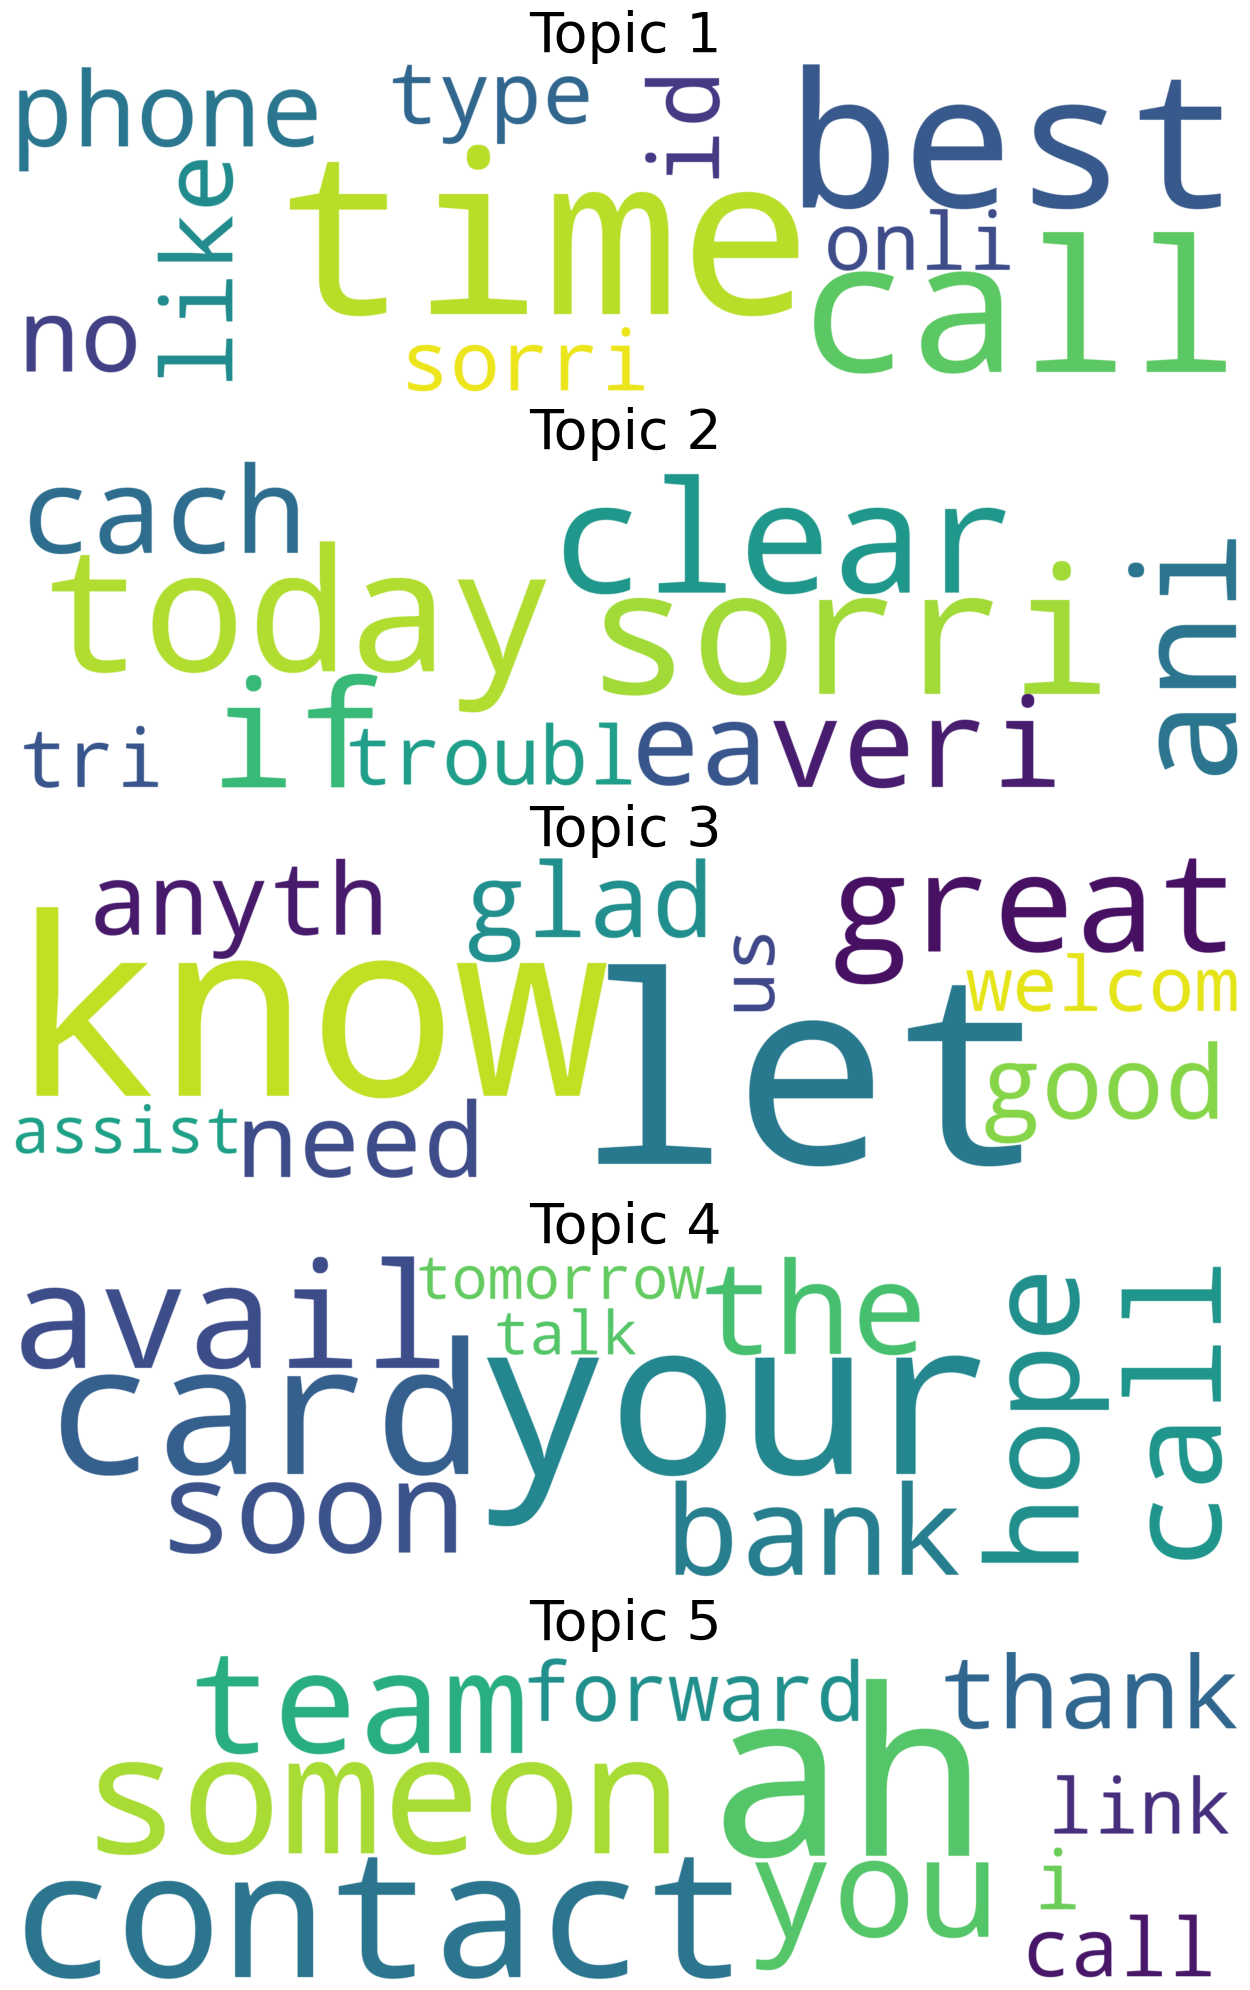

In [ ]:
# article_data = range(len(processed_corpus_citi))
# for article in "The quick brown fox jumped jumped over the the lazy red red red red red dog.":
#     article_data = article_data+" "+article

# #ploting the word cloud
# plt.figure(figsize=(10, 10))
# wordcloud = WordCloud(width = 500, height = 500, background_color='#40E0D0', colormap="ocean",  random_state=10).generate(article_data)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.show()

# for t in range(5):
#     plt.figure()
#     plt.imshow(WordCloud().fit_words(lda.show_topic(t, 200)))
#     plt.axis("off")
#     plt.title("Topic #" + str(t))
#     plt.show()

topics_citi = lda_citi.show_topics(num_topics=lda_citi.num_topics, formatted=False)

fig, axes = plt.subplots(nrows=lda_citi.num_topics, figsize=(20, 20), dpi=100)
for i, (topics_citi, keywords) in enumerate(topics_citi):
    keywords_citi = dict(keywords)
    wordcloud_citi = WordCloud(width=3000, height=800, background_color='white').generate_from_frequencies(keywords_citi)
    axes[i].imshow(wordcloud_citi, interpolation='bilinear')
    axes[i].set_title(f"Topic {i+1}", fontsize=40)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

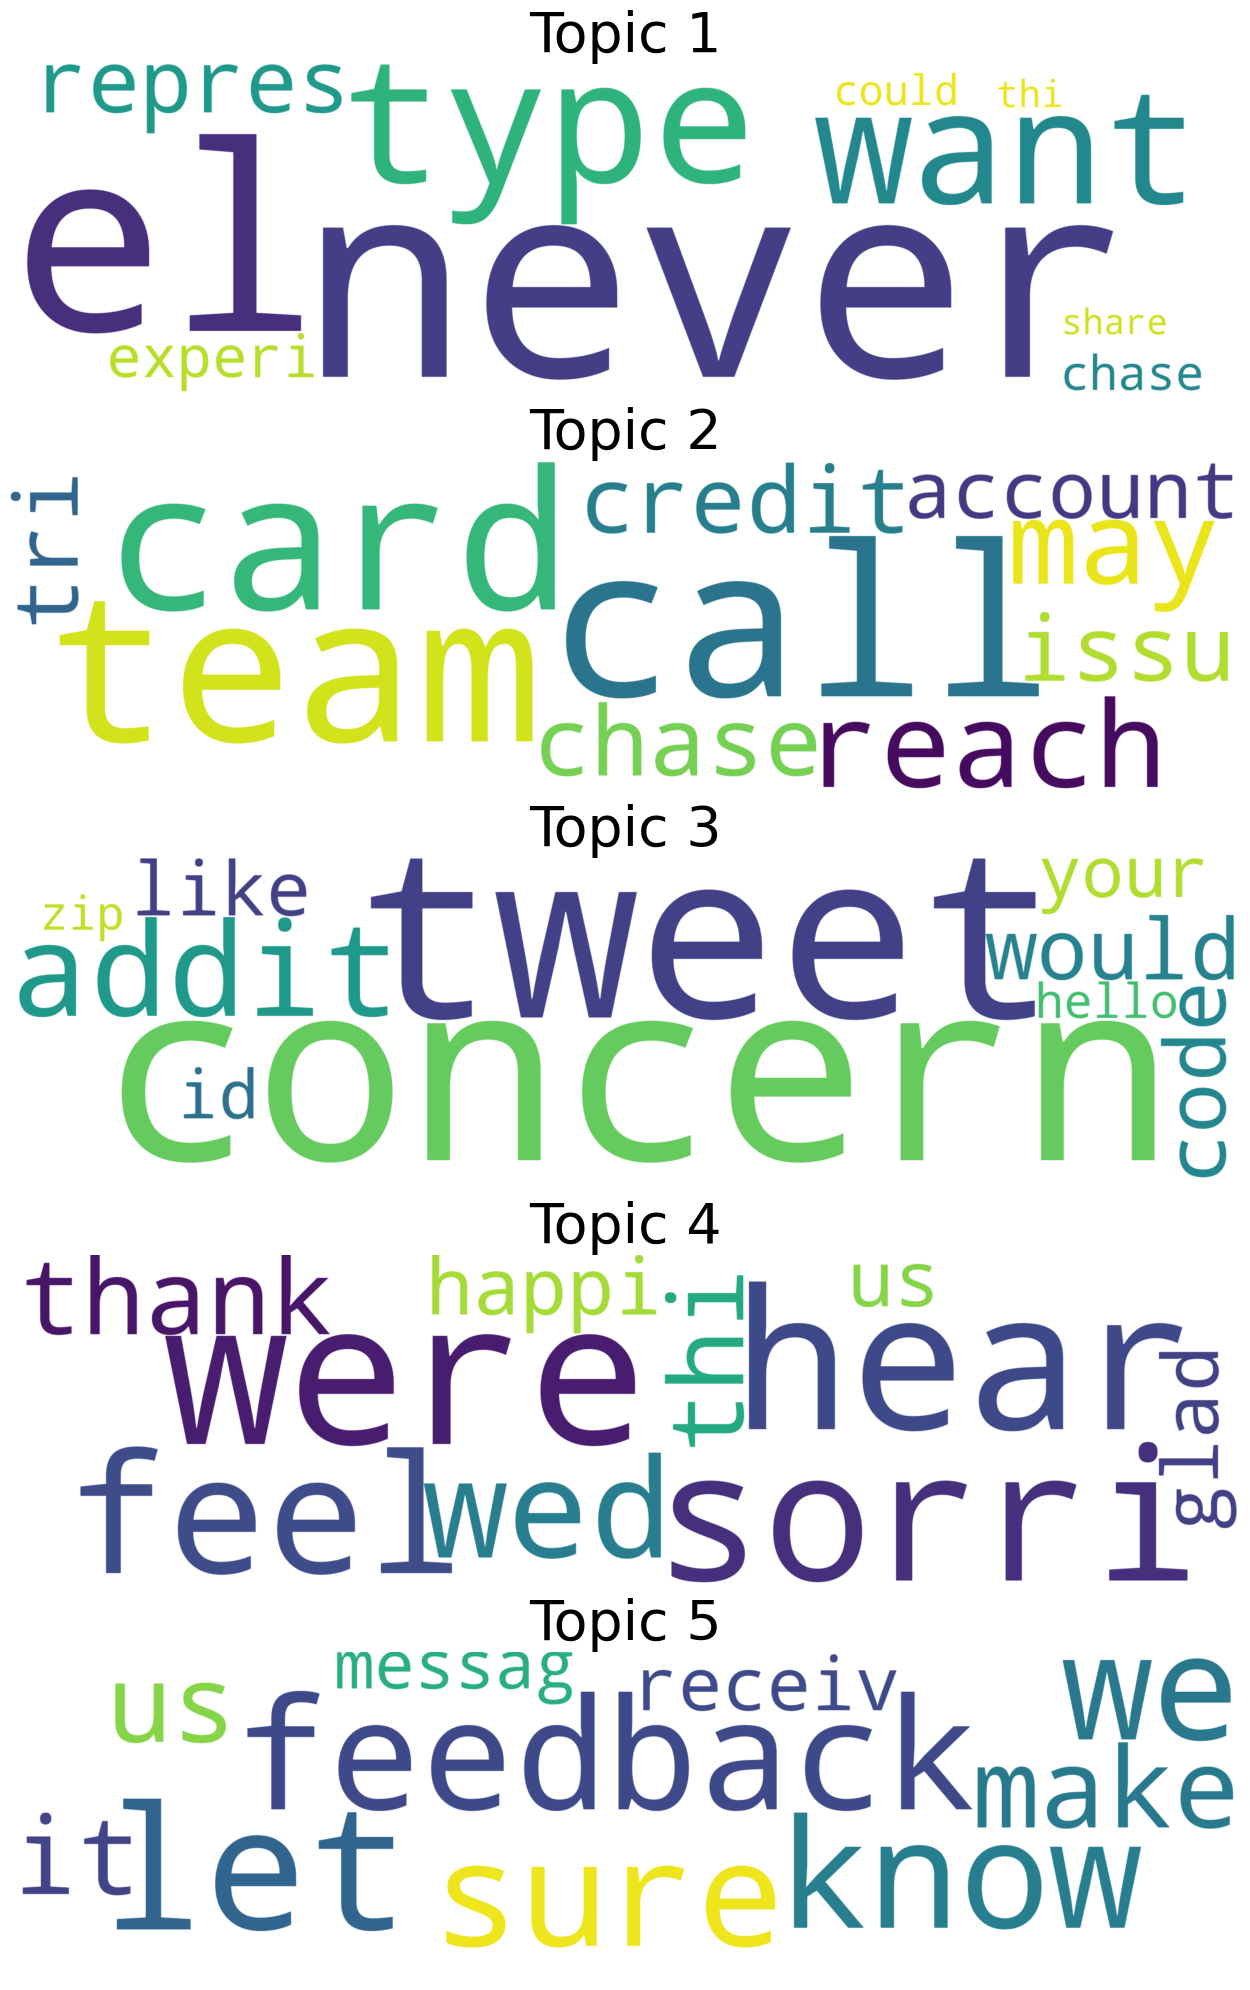

In [ ]:
topics_chase = lda_chase.show_topics(num_topics=lda_chase.num_topics, formatted=False)

fig, axes = plt.subplots(nrows=lda_chase.num_topics, figsize=(20, 20), dpi=100)
for i, (topics_chase, keywords) in enumerate(topics_chase):
    keywords_chase = dict(keywords)
    wordcloud_chase = WordCloud(width=3000, height=800, background_color='white').generate_from_frequencies(keywords_chase)
    axes[i].imshow(wordcloud_chase, interpolation='bilinear')
    axes[i].set_title(f"Topic {i+1}", fontsize=40)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

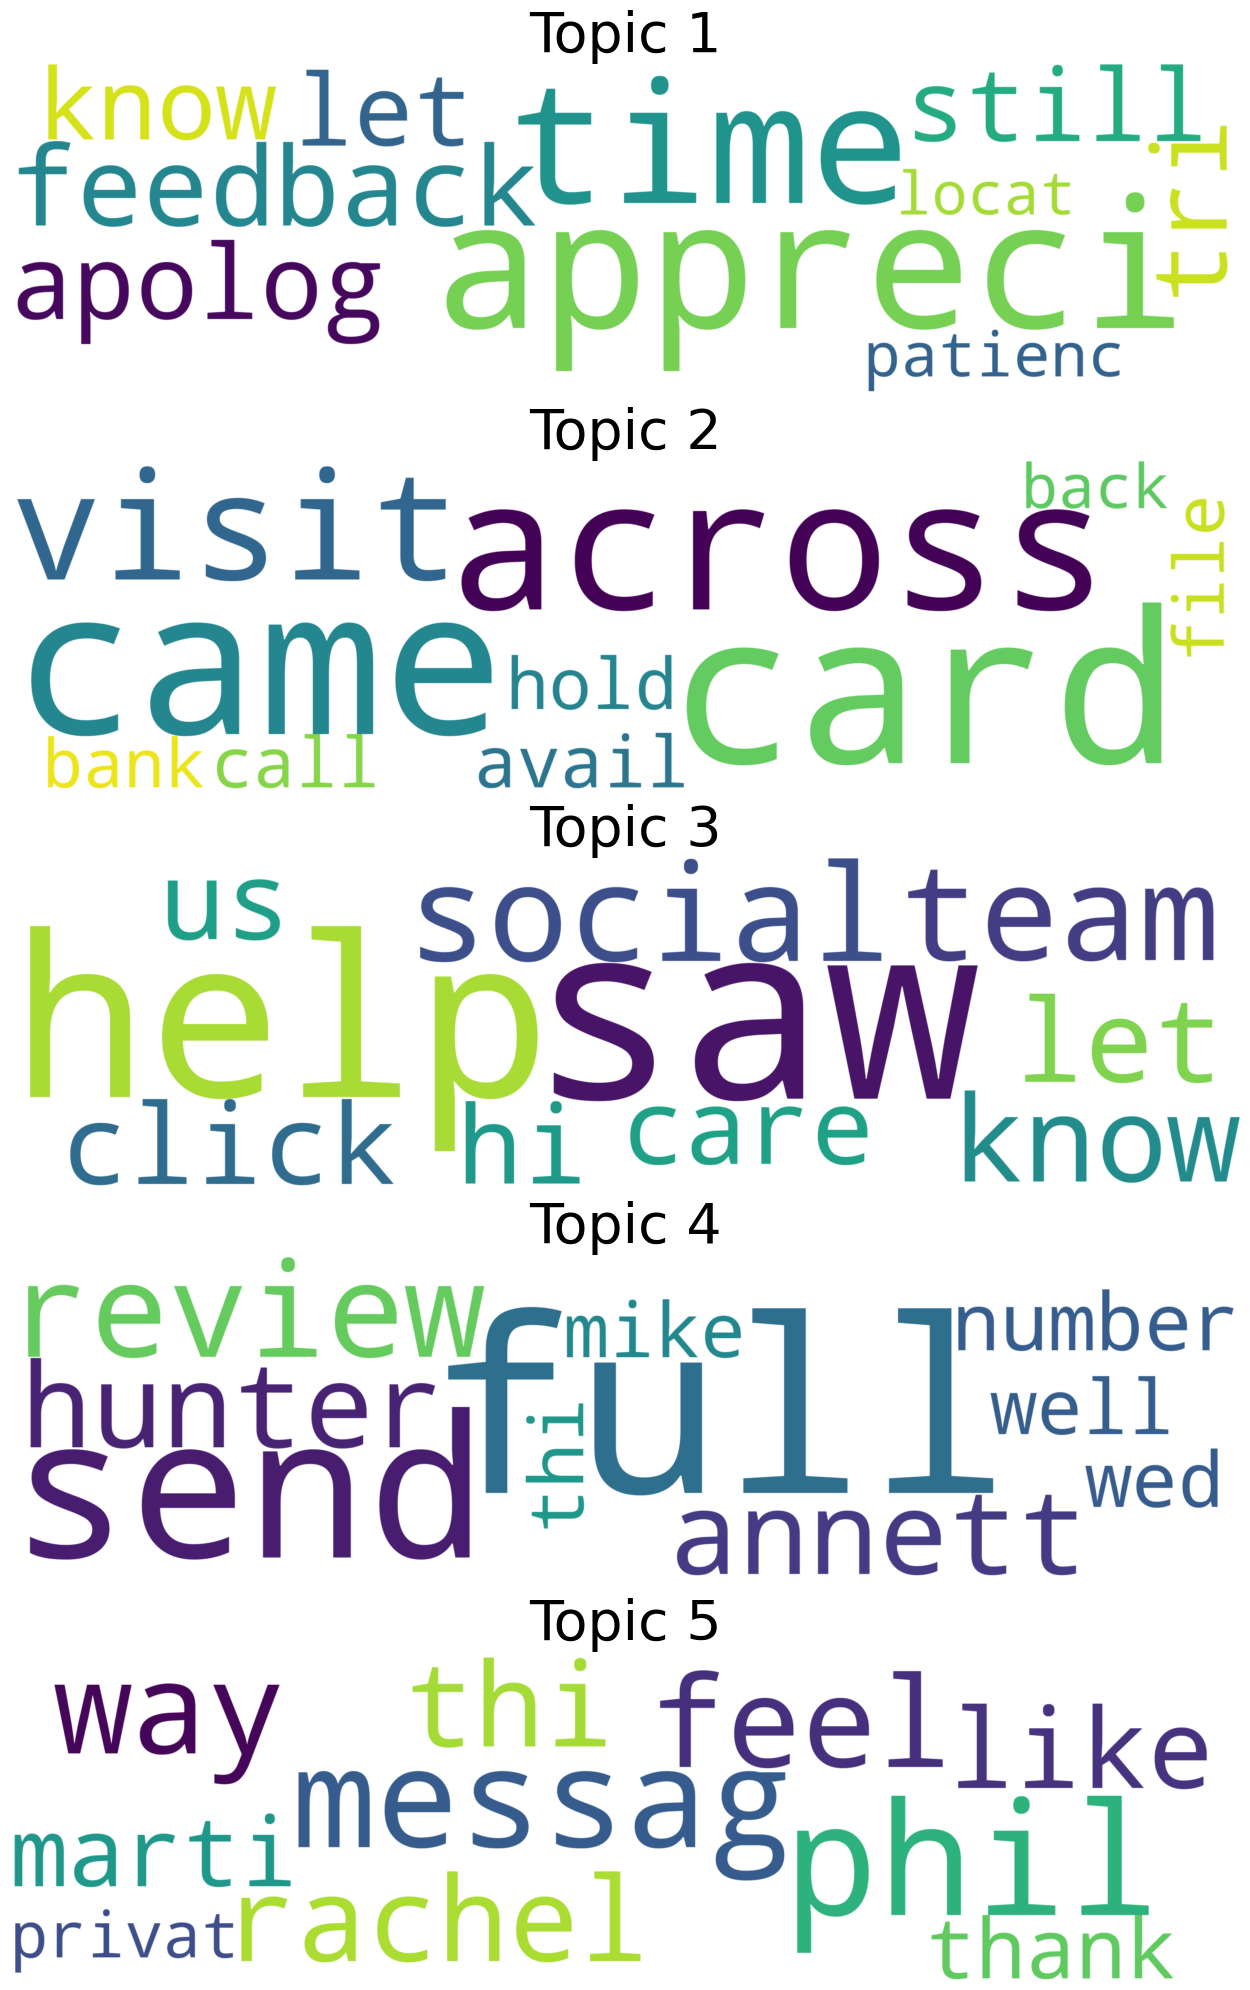

In [ ]:
topics_bank_of_america = lda_bank_of_america.show_topics(num_topics=lda_bank_of_america.num_topics, formatted=False)

fig, axes = plt.subplots(nrows=lda_bank_of_america.num_topics, figsize=(20, 20), dpi=100)
for i, (topics_bank_of_america, keywords) in enumerate(topics_bank_of_america):
    keywords_bank_of_america = dict(keywords)
    wordcloud_bank_of_america = WordCloud(width=3000, height=800, background_color='white').generate_from_frequencies(keywords_bank_of_america)
    axes[i].imshow(wordcloud_bank_of_america, interpolation='bilinear')
    axes[i].set_title(f"Topic {i+1}", fontsize=40)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

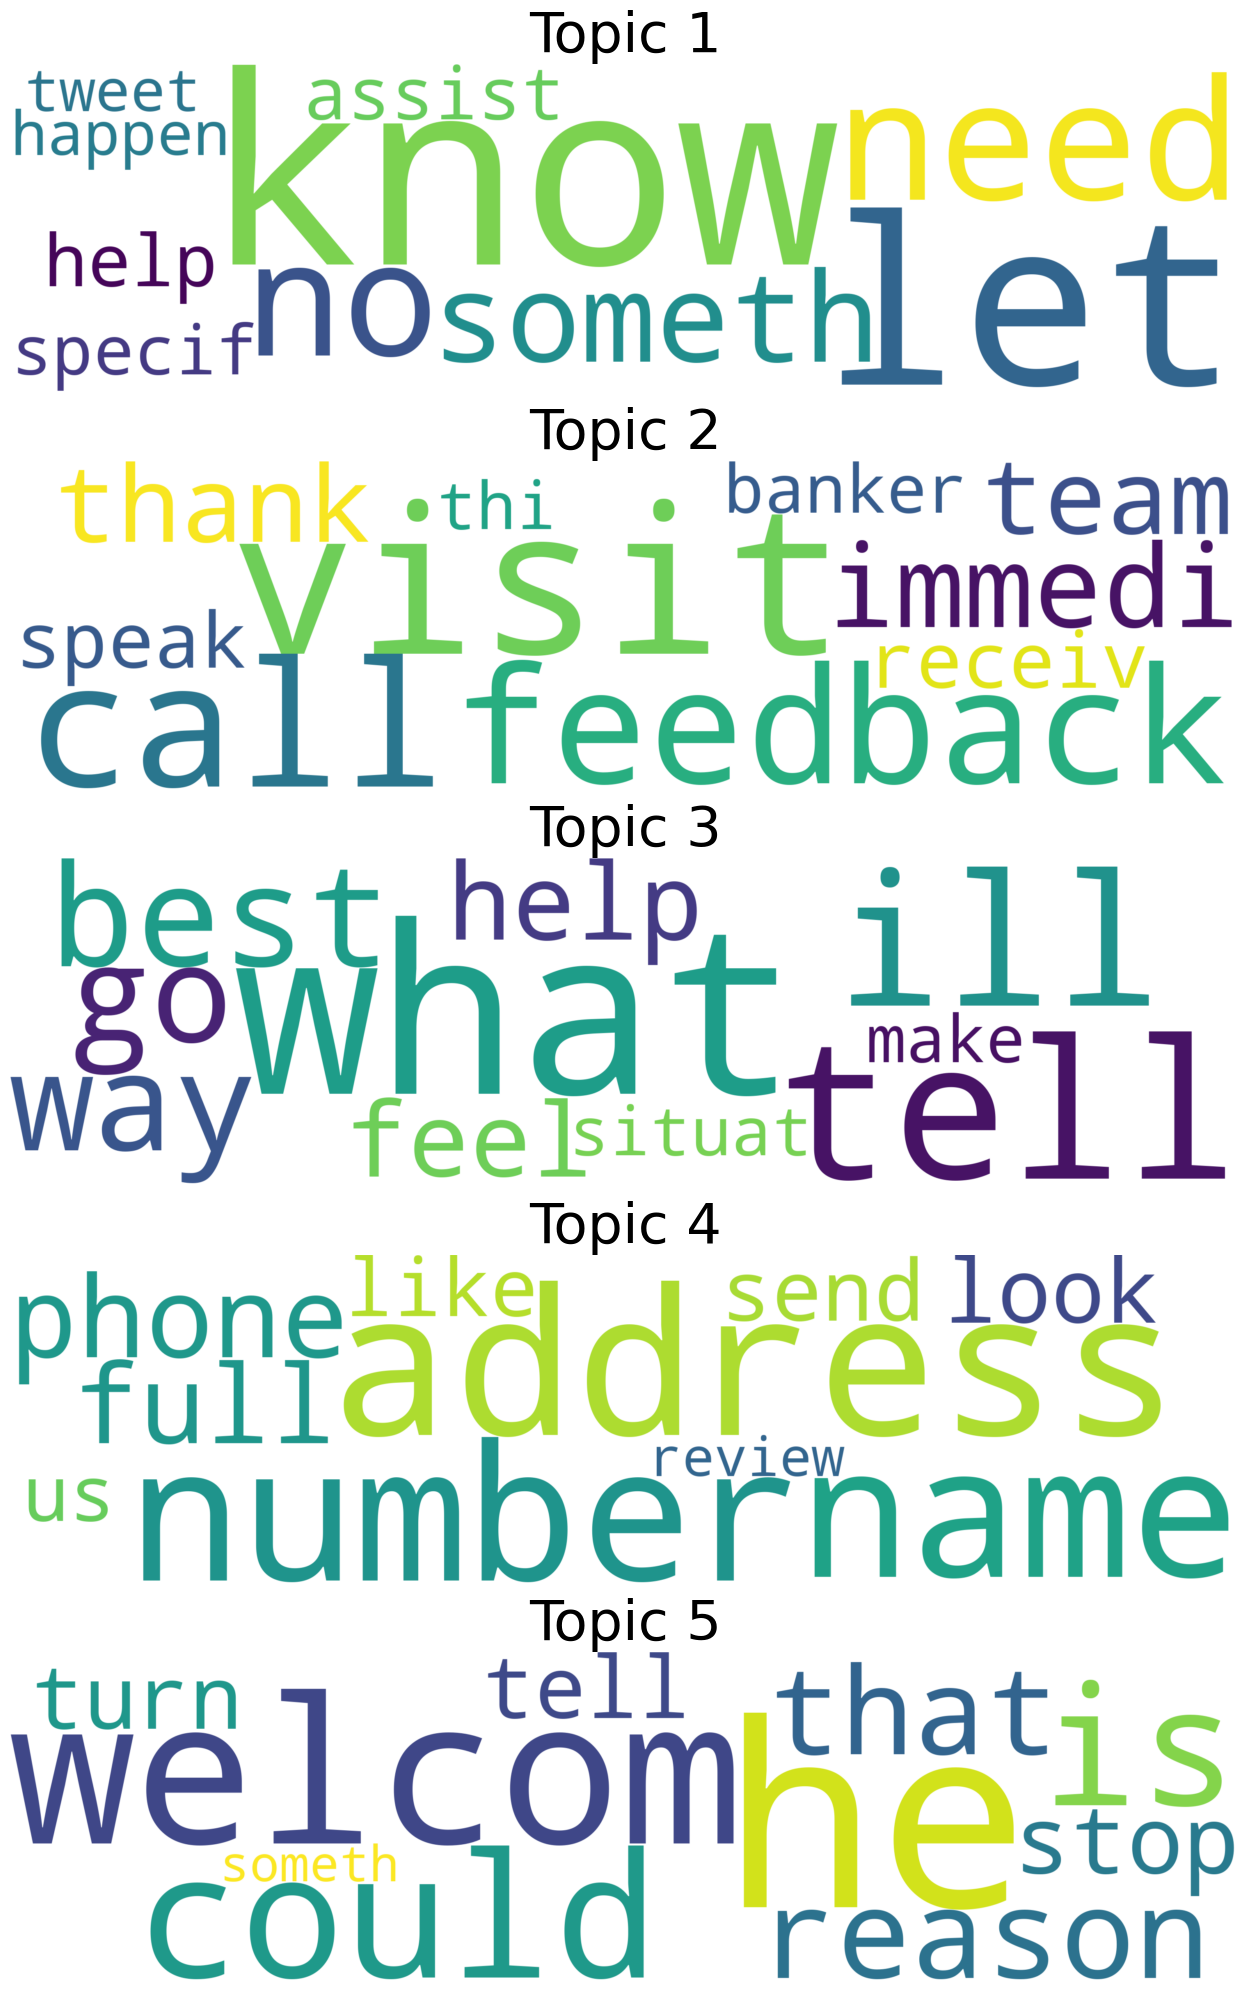

In [ ]:
topics_wells_fargo = lda_wells_fargo.show_topics(num_topics=lda_wells_fargo.num_topics, formatted=False)

fig, axes = plt.subplots(nrows=lda_wells_fargo.num_topics, figsize=(20, 20), dpi=100)
for i, (topics_wells_fargo, keywords) in enumerate(topics_wells_fargo):
    keywords_wells_fargo = dict(keywords)
    wordcloud_wells_fargo = WordCloud(width=3000, height=800, background_color='white').generate_from_frequencies(keywords_wells_fargo)
    axes[i].imshow(wordcloud_wells_fargo, interpolation='bilinear')
    axes[i].set_title(f"Topic {i+1}", fontsize=40)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

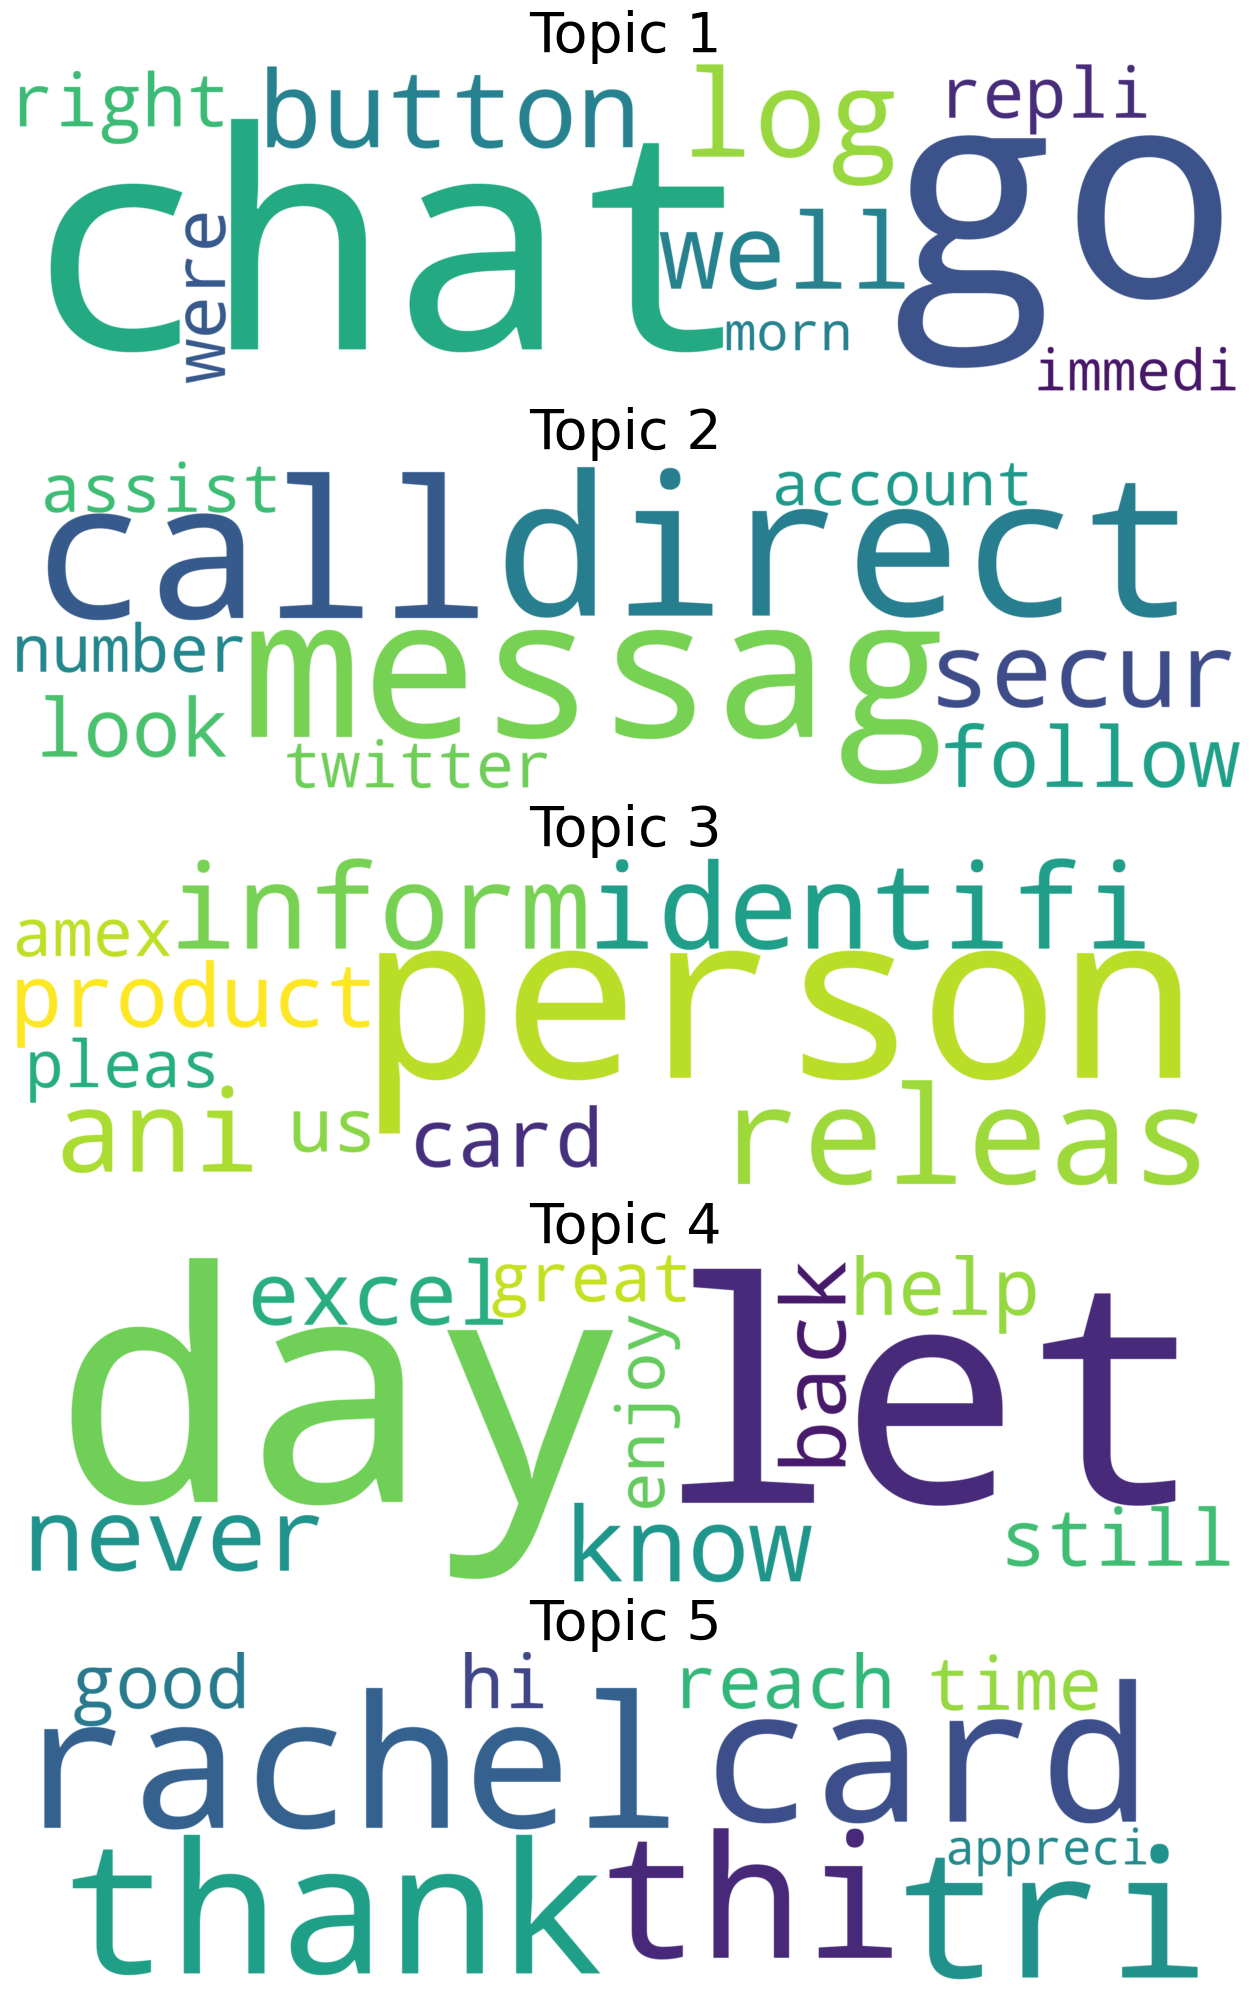

In [ ]:
topics_am_ex = lda_am_ex.show_topics(num_topics=lda_am_ex.num_topics, formatted=False)

fig, axes = plt.subplots(nrows=lda_am_ex.num_topics, figsize=(20, 20), dpi=100)
for i, (topics_am_ex, keywords) in enumerate(topics_am_ex):
    keywords_am_ex = dict(keywords)
    wordcloud_am_ex = WordCloud(width=3000, height=800, background_color='white').generate_from_frequencies(keywords_am_ex)
    axes[i].imshow(wordcloud_am_ex, interpolation='bilinear')
    axes[i].set_title(f"Topic {i+1}", fontsize=40)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

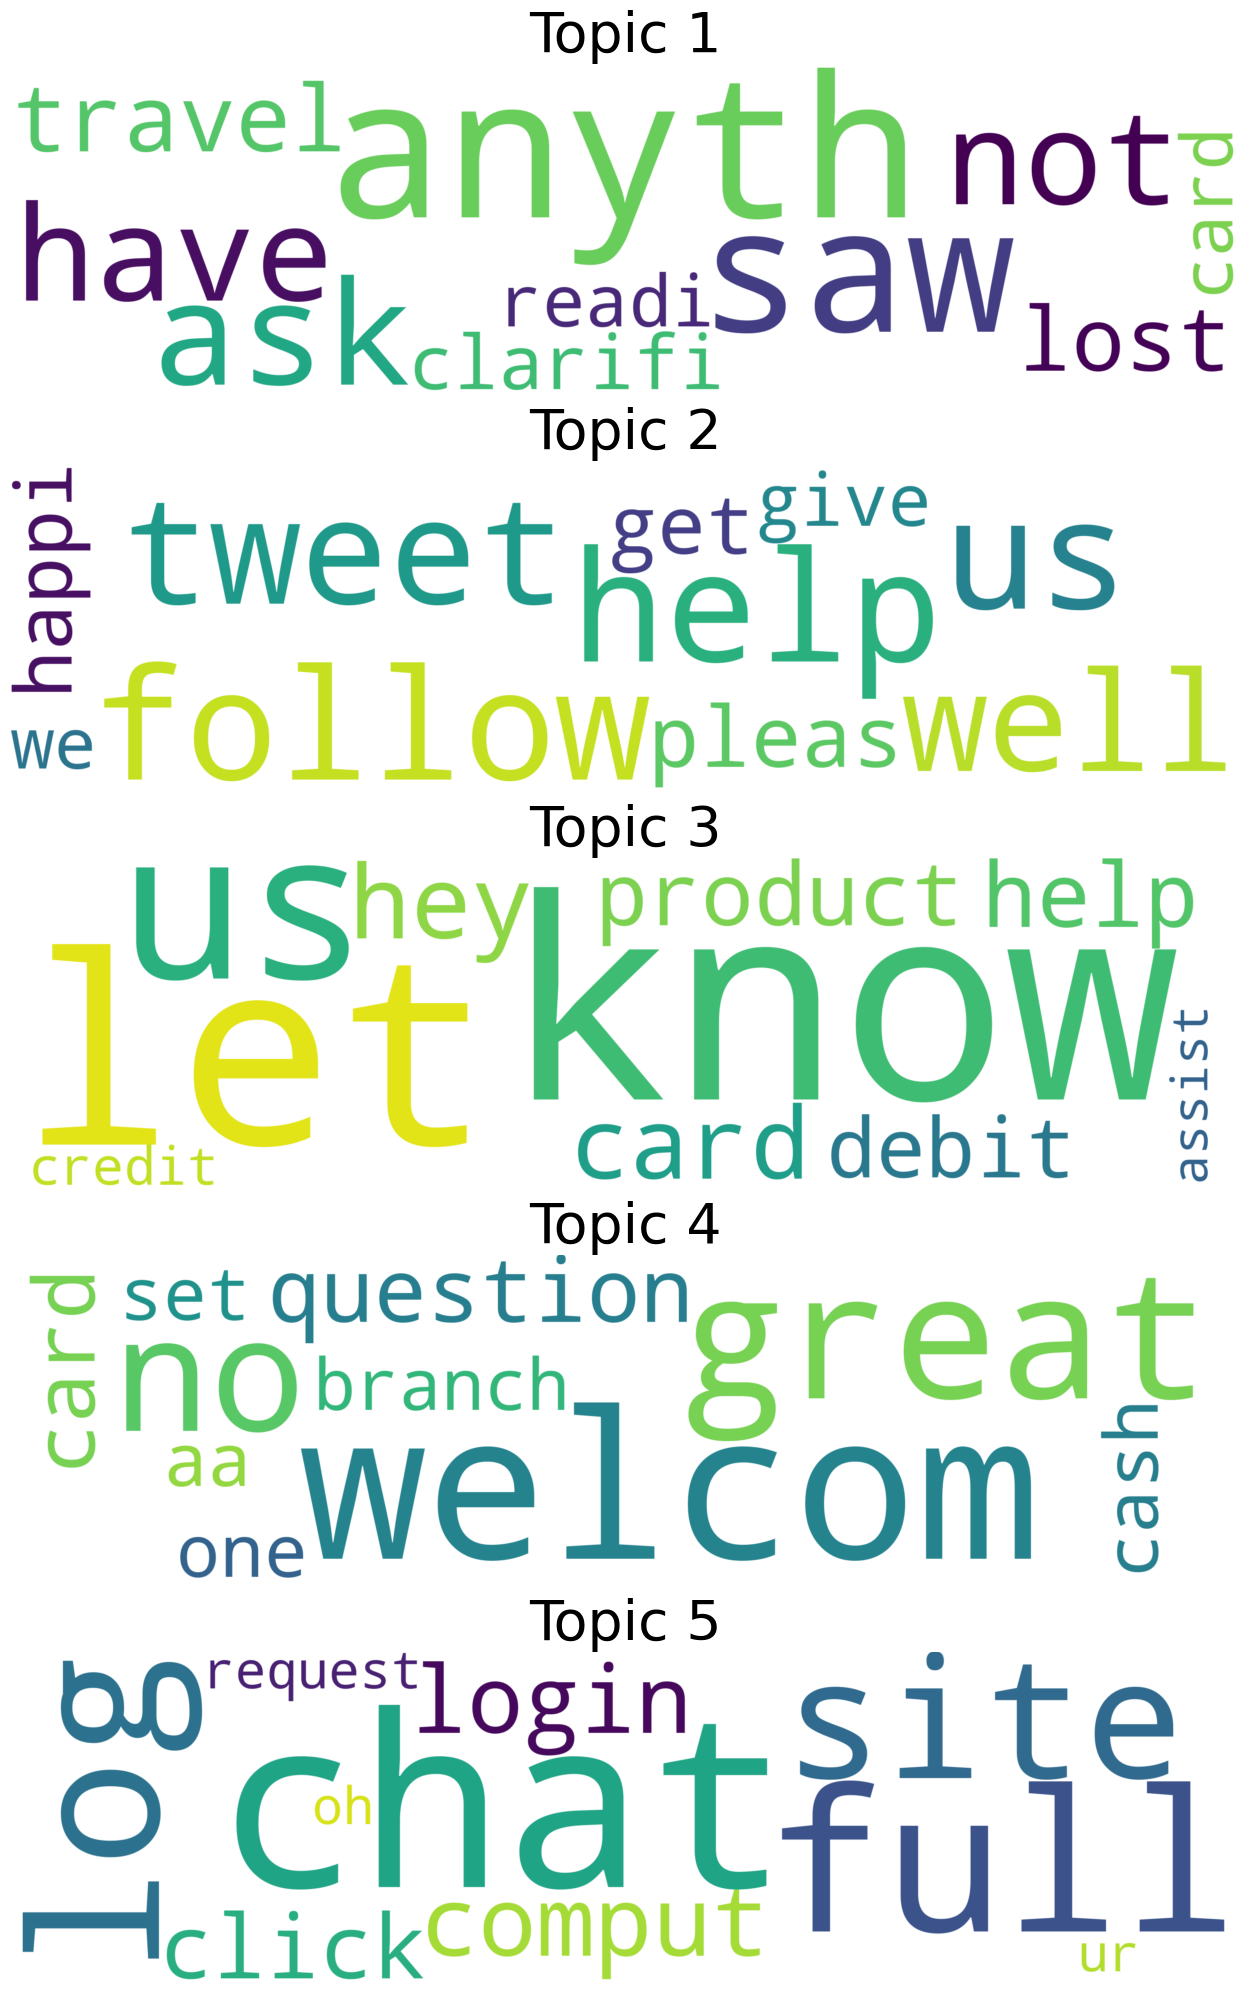

In [ ]:
topics_capital_one = lda_capital_one.show_topics(num_topics=lda_capital_one.num_topics, formatted=False)

fig, axes = plt.subplots(nrows=lda_capital_one.num_topics, figsize=(20, 20), dpi=100)
for i, (topics_capital_one, keywords) in enumerate(topics_capital_one):
    keywords_capital_one = dict(keywords)
    wordcloud_capital_one = WordCloud(width=3000, height=800, background_color='white').generate_from_frequencies(keywords_capital_one)
    axes[i].imshow(wordcloud_capital_one, interpolation='bilinear')
    axes[i].set_title(f"Topic {i+1}",fontsize=40)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Citi:
Topic 1: Contacting Citi
Topic 2: International
Topic 3: Getting a credit card
Topic 4: Customer service
Topic 5: Citi issues

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis_citi = gensimvis.prepare(lda_citi, tfidf_corpus_citi, dictionary_citi)
pyLDAvis.display(vis_citi)

Chase:
Topic 1: Discussing issues
Topic 2: Contacting Chase
Topic 3: Customer feedback
Topic 4: Customer service
Topic 5: Customer feedback?

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis_chase = gensimvis.prepare(lda_chase, tfidf_corpus_chase, dictionary_chase)
pyLDAvis.display(vis_chase)

Bank of America:
Topic 1: Receiving help
Topic 2: Sedning issues over
Topic 3: Feedback
Topic 4: Credit card
Topic 5: Customer service

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis_bank_of_america = gensimvis.prepare(lda_bank_of_america, tfidf_corpus_bank_of_america, dictionary_bank_of_america)
pyLDAvis.display(vis_bank_of_america)

Capital One:
Topic 1: Logging in and requests
Topic 2: Assistance on Twitter
Topic 3: Payment questions
Topic 4: Product assistance
Topic 5: Lost cards

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis_capital_one = gensimvis.prepare(lda_capital_one, tfidf_corpus_capital_one, dictionary_capital_one)
pyLDAvis.display(vis_capital_one)

Wells Fargo:
Topic 1: Identification, accounts
Topic 2: Feedback
Topic 3: Concern, receiving help
Topic 4: Receiving help in future
Topic 5: Customer service

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis_wells_fargo = gensimvis.prepare(lda_wells_fargo, tfidf_corpus_wells_fargo, dictionary_wells_fargo)
pyLDAvis.display(vis_wells_fargo)

American Express
Topic 1: Card issues
Topic 2: Receiving assistance
Topic 3: Identification
Topic 4: Customer service
Topic 5: Chat and logging in

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis_am_ex = gensimvis.prepare(lda_am_ex, tfidf_corpus_am_ex, dictionary_am_ex)
pyLDAvis.display(vis_am_ex)

In [ ]:
def sentiment_scores(Tweet):

    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(Tweet)

    # print("Overall sentiment dictionary is : ", sentiment_dict)
    # print(" was rated as ", sentiment_dict['neg']*100, "% Negative")
    # print("Tweet was rated as ", sentiment_dict['neu']*100, "% Neutral")
    # print("Tweet was rated as ", sentiment_dict['pos']*100, "% Positive")
    print("Tweet Overall Rated As", end = " ")

    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")

    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")

    else :
        print("Neutral")

In [ ]:
sentiment_scores(citi['Tweet'])
citi.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
citi_pre_2020 = pd.DataFrame()
citi_post_2020 = pd.DataFrame()

citi['Tokenized Timestamp'] = citi['Timestamp'].apply(tokenize)
citi.head()

Tweet ID                                                URL  \
0  1.662154e+18  https://twitter.com/AskCiti/status/16621536780...   
1  1.662153e+18  https://twitter.com/AskCiti/status/16621533427...   
2  1.662140e+18  https://twitter.com/AskCiti/status/16621400089...   
3  1.662138e+18  https://twitter.com/AskCiti/status/16621379521...   
4  1.662136e+18  https://twitter.com/AskCiti/status/16621360621...   

                    Timestamp  Username  User Bio  \
0  May 26, 2023 · 5:48 PM UTC  @AskCiti  Ask Citi   
1  May 26, 2023 · 5:46 PM UTC  @AskCiti  Ask Citi   
2  May 26, 2023 · 4:53 PM UTC  @AskCiti  Ask Citi   
3  May 26, 2023 · 4:45 PM UTC  @AskCiti  Ask Citi   
4  May 26, 2023 · 4:38 PM UTC  @AskCiti  Ask Citi   

                                               Tweet  \
0  Hi Nelson, we haven't heard back and want to e...   
1  Hello! Thank you for raising this concern abou...   
2  Hello and welcome to Citibank U.S. This does n...   
3  The password requirements indicated "No digita...   
4  Hello and welcome to Citibank U.S. We would li...   

                                       pre_processed  \
0  [hi, nelson, havent, back, want, ensur, need, ...   
1  [hello, thank, rais, thi, concern, made, someo...   
2  [hello, welcom, us, thi, doe, look, like, vali...   
3  [the, password, digit, base, password, provid,...   
4  [hello, welcom, us, would, like, see, help, pl...   

                    Tokenized Timestamp  
0  [May, 26, ,, 2023, ·, 5:48, PM, UTC]  
1  [May, 26, ,, 2023, ·, 5:46, PM, UTC]  
2  [May, 26, ,, 2023, ·, 4:53, PM, UTC]  
3  [May, 26, ,, 2023, ·, 4:45, PM, UTC]  
4  [May, 26, ,, 2023, ·, 4:38, PM, UTC]

In [ ]:
for index, row in citi.iterrows():
    if '2023' in citi['Tokenized Timestamp'][index]:
        citi_post_2020 = citi_post_2020._append(row, ignore_index=True)
    elif '2022' in citi['Tokenized Timestamp'][index]:
        citi_post_2020 = citi_post_2020._append(row, ignore_index=True)
    elif '2021' in citi['Tokenized Timestamp'][index]:
        citi_post_2020 = citi_post_2020._append(row, ignore_index=True)
    elif '2020' in citi['Tokenized Timestamp'][index]:
        citi_post_2020 = citi_post_2020._append(row, ignore_index=True)
    else:
        citi_pre_2020 = citi_pre_2020._append(row, ignore_index=True)

In [ ]:
citi_post_2020.head()

Tweet ID                                                URL  \
0  1.662154e+18  https://twitter.com/AskCiti/status/16621536780...   
1  1.662153e+18  https://twitter.com/AskCiti/status/16621533427...   
2  1.662140e+18  https://twitter.com/AskCiti/status/16621400089...   
3  1.662138e+18  https://twitter.com/AskCiti/status/16621379521...   
4  1.662136e+18  https://twitter.com/AskCiti/status/16621360621...   

                    Timestamp  Username  User Bio  \
0  May 26, 2023 · 5:48 PM UTC  @AskCiti  Ask Citi   
1  May 26, 2023 · 5:46 PM UTC  @AskCiti  Ask Citi   
2  May 26, 2023 · 4:53 PM UTC  @AskCiti  Ask Citi   
3  May 26, 2023 · 4:45 PM UTC  @AskCiti  Ask Citi   
4  May 26, 2023 · 4:38 PM UTC  @AskCiti  Ask Citi   

                                               Tweet  \
0  Hi Nelson, we haven't heard back and want to e...   
1  Hello! Thank you for raising this concern abou...   
2  Hello and welcome to Citibank U.S. This does n...   
3  The password requirements indicated "No digita...   
4  Hello and welcome to Citibank U.S. We would li...   

                                       pre_processed  \
0  [hi, nelson, havent, back, want, ensur, need, ...   
1  [hello, thank, rais, thi, concern, made, someo...   
2  [hello, welcom, us, thi, doe, look, like, vali...   
3  [the, password, digit, base, password, provid,...   
4  [hello, welcom, us, would, like, see, help, pl...   

                    Tokenized Timestamp  
0  [May, 26, ,, 2023, ·, 5:48, PM, UTC]  
1  [May, 26, ,, 2023, ·, 5:46, PM, UTC]  
2  [May, 26, ,, 2023, ·, 4:53, PM, UTC]  
3  [May, 26, ,, 2023, ·, 4:45, PM, UTC]  
4  [May, 26, ,, 2023, ·, 4:38, PM, UTC]

In [ ]:
citi_pre_2020.head()

Tweet ID                                                URL  \
0  1.212139e+18  https://twitter.com/AskCiti/status/12121388380...   
1  1.212106e+18  https://twitter.com/AskCiti/status/12121059588...   
2  1.212105e+18  https://twitter.com/AskCiti/status/12121047313...   
3  1.212099e+18  https://twitter.com/AskCiti/status/12120985063...   
4  1.212097e+18  https://twitter.com/AskCiti/status/12120974927...   

                     Timestamp  Username  User Bio  \
0  Dec 31, 2019 · 10:29 PM UTC  @AskCiti  Ask Citi   
1   Dec 31, 2019 · 8:19 PM UTC  @AskCiti  Ask Citi   
2   Dec 31, 2019 · 8:14 PM UTC  @AskCiti  Ask Citi   
3   Dec 31, 2019 · 7:49 PM UTC  @AskCiti  Ask Citi   
4   Dec 31, 2019 · 7:45 PM UTC  @AskCiti  Ask Citi   

                                               Tweet  \
0  Hi there! We'd like to see if we can help. Ple...   
1  Hi there. Just wanted to see if you still need...   
2  Hi Amber, were you able to get your issue reso...   
3  Thank you for your response. I'd like to help....   
4  Hello Carolina, thank you for reaching out. My...   

                                       pre_processed  \
0  [hi, wed, like, see, help, pleas, send, us, ve...   
1               [hi, see, still, ani, assist, brian]   
2  [hi, amber, abl, get, issu, resolv, let, us, k...   
3  [thank, respons, id, like, help, pleas, send, ...   
4  [hello, carolina, thank, reach, ani, inconveni...   

                     Tokenized Timestamp  
0  [Dec, 31, ,, 2019, ·, 10:29, PM, UTC]  
1   [Dec, 31, ,, 2019, ·, 8:19, PM, UTC]  
2   [Dec, 31, ,, 2019, ·, 8:14, PM, UTC]  
3   [Dec, 31, ,, 2019, ·, 7:49, PM, UTC]  
4   [Dec, 31, ,, 2019, ·, 7:45, PM, UTC]

In [ ]:
processed_corpus_citi_pre_2020 = [text for text in citi_pre_2020['pre_processed']]
dictionary_citi_pre_2020 = corpora.Dictionary(processed_corpus_citi_pre_2020)

bow_corpus_citi_pre_2020 = [dictionary_citi_pre_2020.doc2bow(text) for text in processed_corpus_citi_pre_2020]
tfidf_citi_pre_2020 = TfidfModel(bow_corpus_citi_pre_2020)
tfidf_corpus_citi_pre_2020 = tfidf_citi_pre_2020[bow_corpus_citi_pre_2020]
lda_citi_pre_2020 = models.LdaModel(tfidf_corpus_citi_pre_2020, num_topics=5, id2word=dictionary_citi_pre_2020, passes=15)



In [ ]:
for idx, topic in lda_citi_pre_2020.print_topics(-1):
    print(f"Topic: {idx}\nWords: {topic}\n")

Topic: 0
Words: 0.016*"speak" + 0.015*"card" + 0.014*"talk" + 0.013*"call" + 0.012*"inconveni" + 0.012*"servic" + 0.011*"name" + 0.011*"sorri" + 0.011*"soon" + 0.011*"thank"

Topic: 1
Words: 0.038*"know" + 0.038*"let" + 0.031*"great" + 0.023*"us" + 0.023*"discuss" + 0.022*"glad" + 0.022*"ill" + 0.021*"welcom" + 0.021*"anyth" + 0.020*"need"

Topic: 2
Words: 0.055*"time" + 0.053*"best" + 0.048*"call" + 0.038*"phone" + 0.034*"like" + 0.033*"no" + 0.031*"id" + 0.030*"type" + 0.029*"sorri" + 0.027*"onli"

Topic: 3
Words: 0.046*"contact" + 0.041*"someon" + 0.024*"team" + 0.023*"thank" + 0.021*"you" + 0.021*"link" + 0.020*"visit" + 0.019*"follow" + 0.018*"thi" + 0.016*"use"

Topic: 4
Words: 0.067*"ah" + 0.033*"tri" + 0.031*"clear" + 0.028*"messag" + 0.026*"check" + 0.024*"cach" + 0.024*"browser" + 0.023*"sorri" + 0.022*"site" + 0.019*"anoth"



In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis_citi_pre_2020 = gensimvis.prepare(lda_citi_pre_2020, tfidf_corpus_citi_pre_2020, dictionary_citi_pre_2020)
pyLDAvis.display(vis_citi_pre_2020)

In [ ]:
processed_corpus_citi_post_2020 = [text for text in citi_post_2020['pre_processed']]
dictionary_citi_post_2020 = corpora.Dictionary(processed_corpus_citi_post_2020)

bow_corpus_citi_post_2020 = [dictionary_citi_post_2020.doc2bow(text) for text in processed_corpus_citi_post_2020]
tfidf_citi_post_2020 = TfidfModel(bow_corpus_citi_post_2020)
tfidf_corpus_citi_post_2020 = tfidf_citi_post_2020[bow_corpus_citi_post_2020]
lda_citi_post_2020 = models.LdaModel(tfidf_corpus_citi_post_2020, num_topics=5, id2word=dictionary_citi_post_2020, passes=15)

In [ ]:
for idx, topic in lda_citi_post_2020.print_topics(-1):
    print(f"Topic: {idx}\nWords: {topic}\n")

Topic: 0
Words: 0.043*"account" + 0.026*"countri" + 0.025*"type" + 0.022*"wa" + 0.022*"includ" + 0.018*"ani" + 0.016*"sincer" + 0.016*"card" + 0.016*"send" + 0.015*"due"

Topic: 1
Words: 0.030*"india" + 0.026*"busi" + 0.026*"team" + 0.023*"fill" + 0.022*"day" + 0.022*"form" + 0.021*"contact" + 0.021*"inform" + 0.020*"thi" + 0.019*"complet"

Topic: 2
Words: 0.029*"account" + 0.021*"moe" + 0.020*"see" + 0.019*"pin" + 0.016*"futur" + 0.016*"type" + 0.016*"tea" + 0.016*"forward" + 0.016*"gloria" + 0.016*"wa"

Topic: 3
Words: 0.020*"call" + 0.019*"phone" + 0.019*"jasmin" + 0.018*"team" + 0.017*"link" + 0.017*"number" + 0.016*"india" + 0.015*"time" + 0.015*"thi" + 0.014*"respons"

Topic: 4
Words: 0.049*"let" + 0.046*"back" + 0.046*"know" + 0.040*"feel" + 0.039*"still" + 0.039*"free" + 0.037*"need" + 0.028*"help" + 0.023*"reach" + 0.022*"havent"



In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis_citi_post_2020 = gensimvis.prepare(lda_citi_post_2020, tfidf_corpus_citi_post_2020, dictionary_citi_post_2020)
pyLDAvis.display(vis_citi_post_2020)

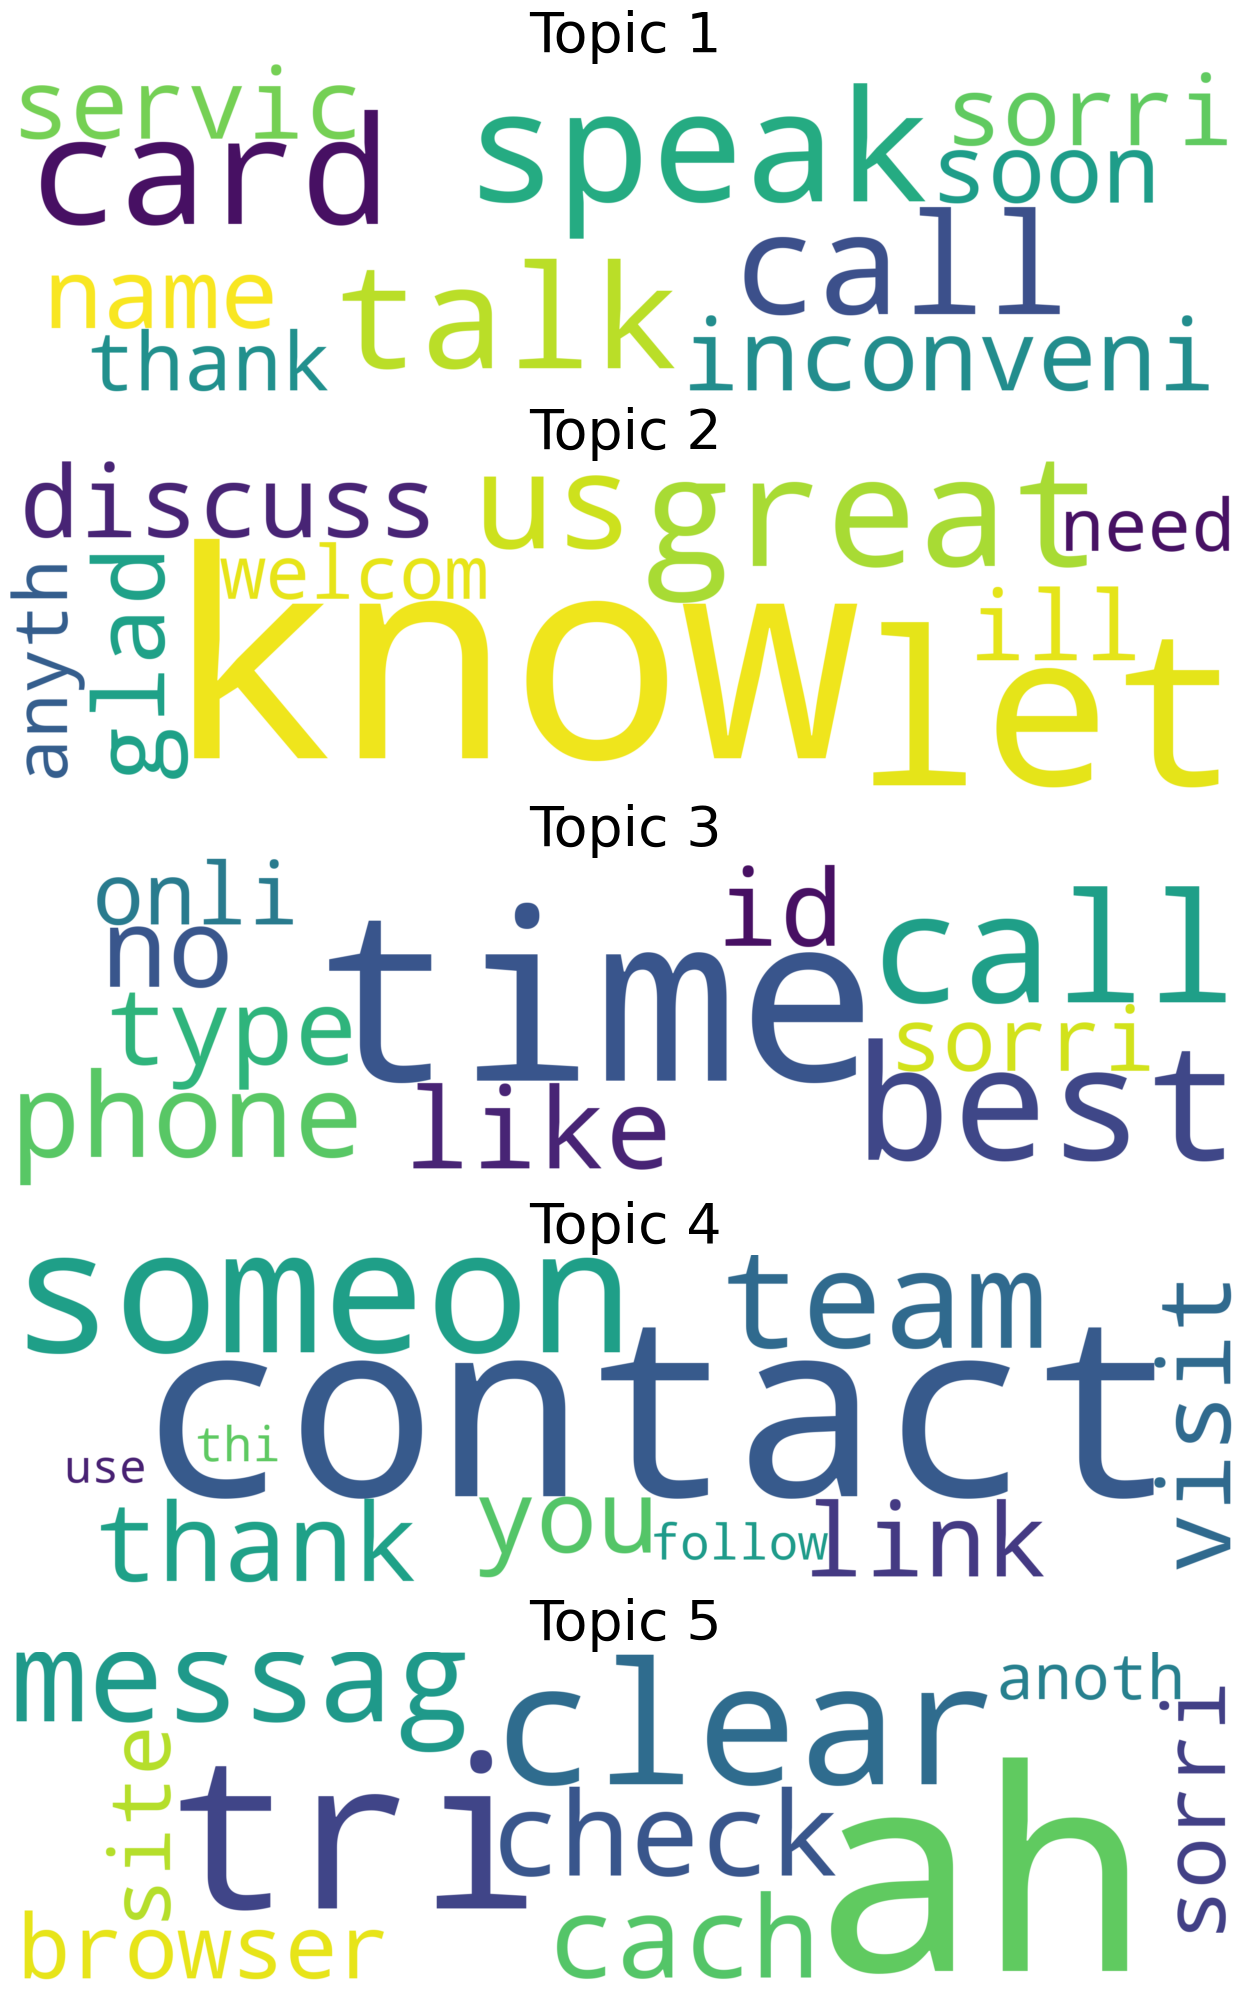

In [ ]:
topics_citi_pre_2020 = lda_citi_pre_2020.show_topics(num_topics=lda_citi_pre_2020.num_topics, formatted=False)

fig, axes = plt.subplots(nrows=lda_citi_pre_2020.num_topics, figsize=(20, 20), dpi=100)
for i, (topics_citi_pre_2020, keywords) in enumerate(topics_citi_pre_2020):
    keywords_citi_pre_2020 = dict(keywords)
    wordcloud_citi_pre_2020 = WordCloud(width=3000, height=800, background_color='white').generate_from_frequencies(keywords_citi_pre_2020)
    axes[i].imshow(wordcloud_citi_pre_2020, interpolation='bilinear')
    axes[i].set_title(f"Topic {i+1}", fontsize=40)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

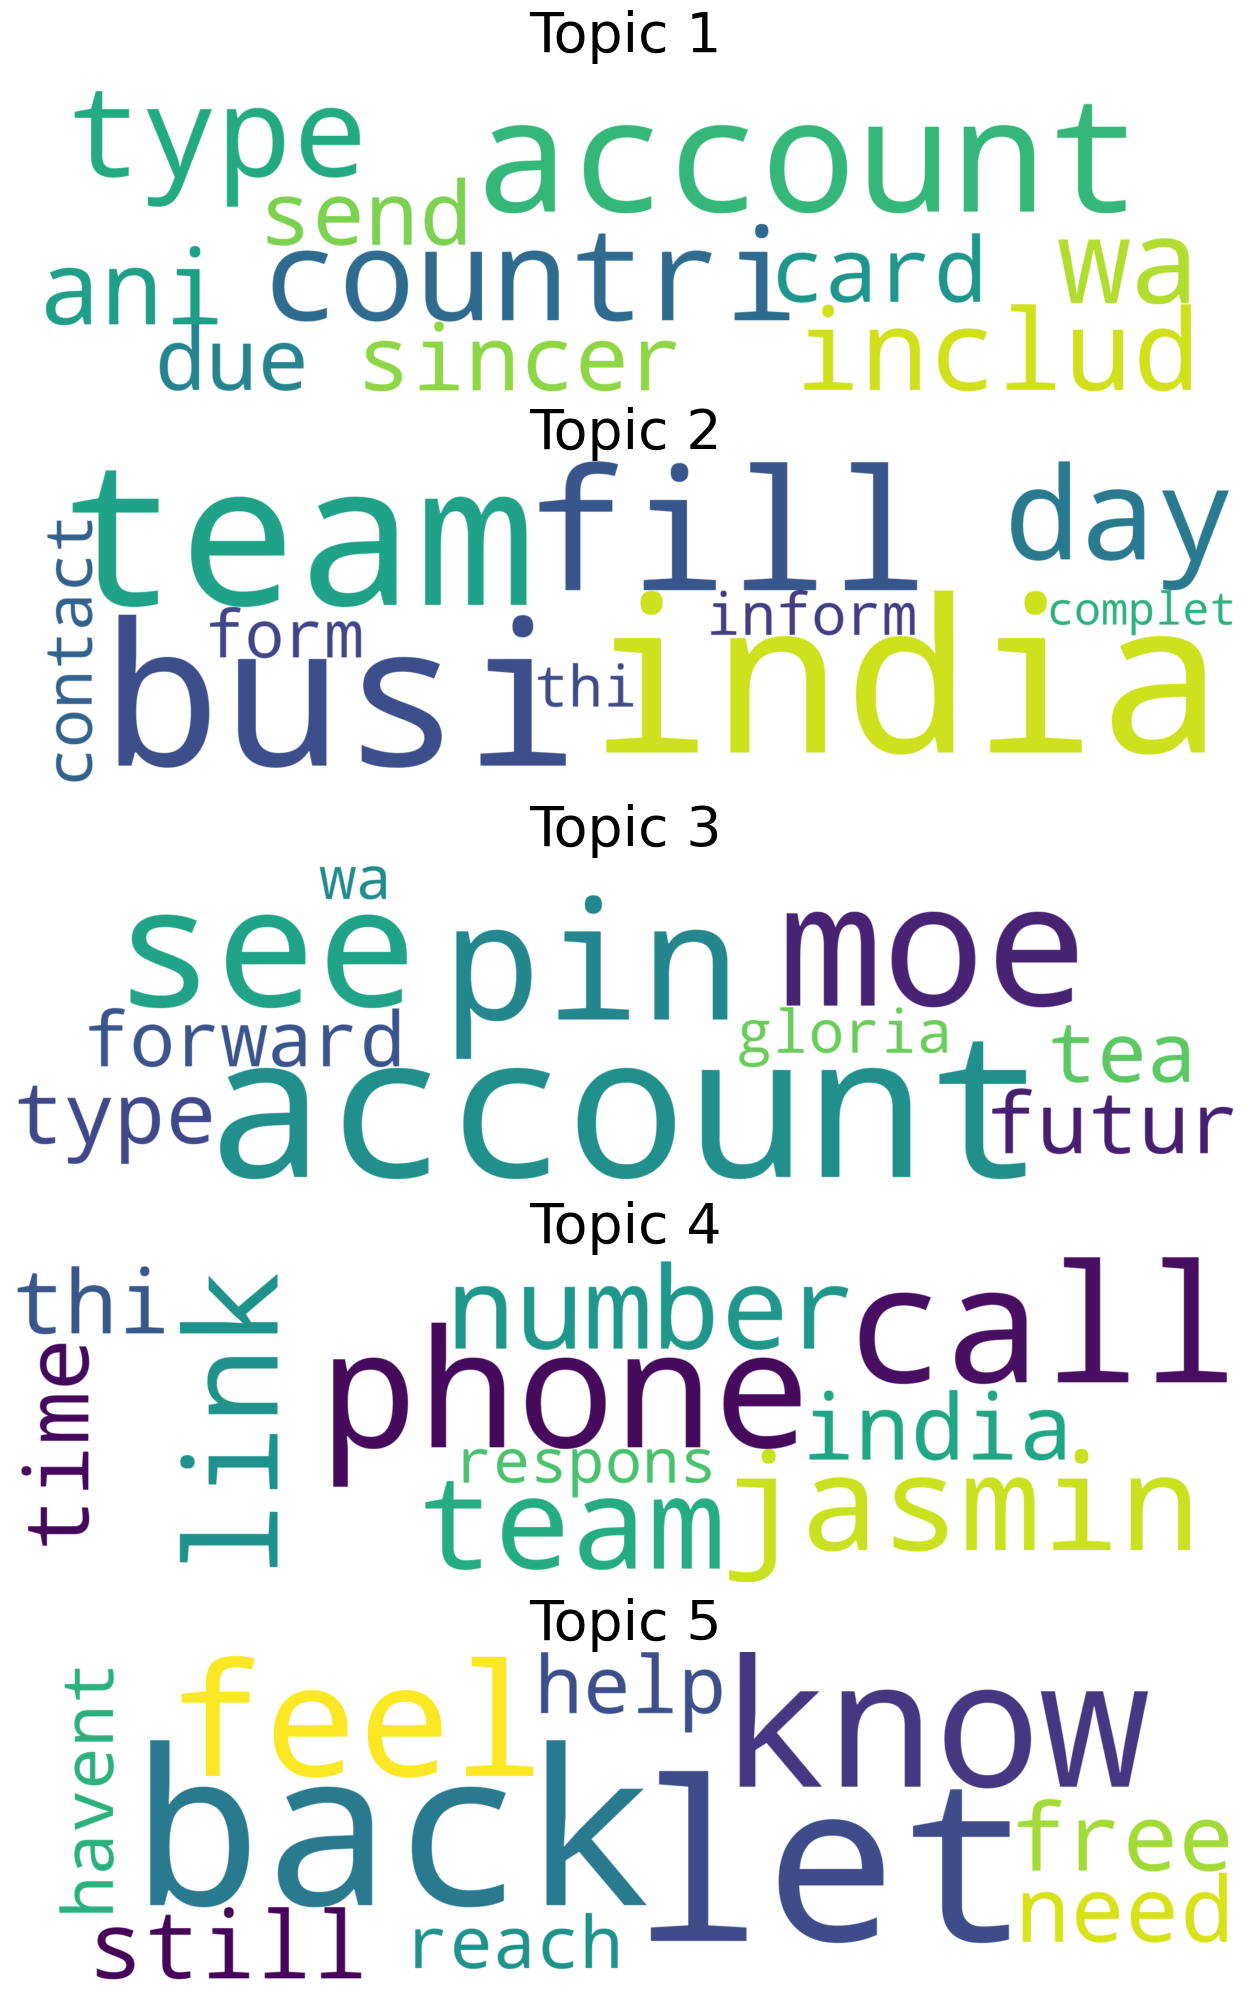

In [ ]:
topics_citi_post_2020 = lda_citi_post_2020.show_topics(num_topics=lda_citi_post_2020.num_topics, formatted=False)

fig, axes = plt.subplots(nrows=lda_citi_post_2020.num_topics, figsize=(20, 20), dpi=100)
for i, (topics_citi_post_2020, keywords) in enumerate(topics_citi_post_2020):
    keywords_citi_post_2020 = dict(keywords)
    wordcloud_citi_post_2020 = WordCloud(width=3000, height=800, background_color='white').generate_from_frequencies(keywords_citi_post_2020)
    axes[i].imshow(wordcloud_citi_post_2020, interpolation='bilinear')
    axes[i].set_title(f"Topic {i+1}", fontsize=40)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Sentiment Analysis (Week 4 of Program)

In [ ]:
def sentiment_scores(Tweet):
    sentiment = ""
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(Tweet)
    if sentiment_dict['compound'] >= 0.05 :
      sentiment = "Positive"
    elif sentiment_dict['compound'] <= - 0.05 :
      sentiment = "Negative"
    else :
      sentiment = "Neutral"
    return sentiment

In [ ]:
citi['sentiment'] = citi['Tweet'].apply(sentiment_scores)
poscount = 0
negcount = 0
neucount = 0
for i in range(len(citi)):
  if citi['sentiment'][i] == 'Positive':
    poscount += 1
  elif citi['sentiment'][i] == 'Negative':
    negcount += 1
  else:
    neucount += 1
print(poscount/len(citi)*100, '% Positive.')
print(negcount/len(citi)*100, '% Negative.')
print(neucount/len(citi)*100, '% Neutral.')

In [ ]:
chase['sentiment'] = chase['Tweet'].apply(sentiment_scores)
poscount = 0
negcount = 0
neucount = 0
for i in range(len(chase)):
  if chase['sentiment'][i] == 'Positive':
    poscount += 1
  elif chase['sentiment'][i] == 'Negative':
    negcount += 1
  else:
    neucount += 1
print(poscount/len(chase)*100, '% Positive.')
print(negcount/len(chase)*100, '% Negative.')
print(neucount/len(chase)*100, '% Neutral.')

In [ ]:
am_ex['sentiment'] = am_ex['Tweet'].apply(sentiment_scores)
poscount = 0
negcount = 0
neucount = 0
for i in range(len(am_ex)):
  if am_ex['sentiment'][i] == 'Positive':
    poscount += 1
  elif am_ex['sentiment'][i] == 'Negative':
    negcount += 1
  else:
    neucount += 1
print(poscount/len(am_ex)*100, '% Positive.')
print(negcount/len(am_ex)*100, '% Negative.')
print(neucount/len(am_ex)*100, '% Neutral.')


In [ ]:
bank_of_america['sentiment'] = bank_of_america['Tweet'].apply(sentiment_scores)
poscount = 0
negcount = 0
neucount = 0
for i in range(len(bank_of_america)):
  if bank_of_america['sentiment'][i] == 'Positive':
    poscount += 1
  elif bank_of_america['sentiment'][i] == 'Negative':
    negcount += 1
  else:
    neucount += 1
print(poscount/len(bank_of_america)*100, '% Positive.')
print(negcount/len(bank_of_america)*100, '% Negative.')
print(neucount/len(bank_of_america)*100, '% Neutral.')

In [ ]:
capital_one['sentiment'] = capital_one['Tweet'].apply(sentiment_scores)
poscount = 0
negcount = 0
neucount = 0
for i in range(len(capital_one)):
  if capital_one['sentiment'][i] == 'Positive':
    poscount += 1
  elif capital_one['sentiment'][i] == 'Negative':
    negcount += 1
  else:
    neucount += 1
print(poscount/len(capital_one)*100, '% Positive.')
print(negcount/len(capital_one)*100, '% Negative.')
print(neucount/len(capital_one)*100, '% Neutral.')

In [ ]:
wells_fargo['sentiment'] = wells_fargo['Tweet'].apply(sentiment_scores)
poscount = 0
negcount = 0
neucount = 0
for i in range(len(wells_fargo)):
  if wells_fargo['sentiment'][i] == 'Positive':
    poscount += 1
  elif wells_fargo['sentiment'][i] == 'Negative':
    negcount += 1
  else:
    neucount += 1
print(poscount/len(wells_fargo)*100, '% Positive.')
print(negcount/len(wells_fargo)*100, '% Negative.')
print(neucount/len(wells_fargo)*100, '% Neutral.')